In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import dotenv_values, find_dotenv
import datetime as dt
import preparecorrelations as pc
pd.set_option('display.max_columns', None)
import regressions as reg
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pycountry

In [140]:
import importlib
importlib.reload(pc)
importlib.reload(reg)

<module 'regressions' from 'c:\\Users\\fuem\\Documents\\correlationmodule\\regressions.py'>

# set parameters and paths, import data

In [3]:
# this looks for your configuration file and then reads it as a dictionary
config = dotenv_values(find_dotenv())

# set path using the dictionary key for which one you want
correlationpath = os.path.abspath(config["CORRELATIONDATA"]) + '\\'
cleandatapath = os.path.abspath(config["CLEANDATA"]) + '\\'
rawdatapath = os.path.abspath(config["RAWDATA"]) + '\\'
ocadatapath = os.path.abspath(config["FRANKELROSEDATA"]) + '\\'
gravitydatapath = os.path.abspath(config["GRAVITYDATA"]) + '\\'

In [4]:
# import haver data
xlsx = pd.ExcelFile(correlationpath + "gdp_consumption_haver_final.xlsx")
# haver real gdp
rgdp = pd.read_excel(xlsx, 'Real GDP')
rgdp.name = "Real GDP"
# haver real consumption
rc = pd.read_excel(xlsx, 'Real C')
rc.name = "Real Consumption"

# oecd employment
oecdemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LREM64TT.STSA.Q/OECD")
# oecd unemployment
oecdunemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LRUN64TT.STSA.Q/OECD")

# imf industrial production index
imfipi = pc.get_from_imf('CompactData/IFS/Q..AIP_SA_IX')

In [5]:
# the developed countries included in the gdp/consumption series
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", 
                  "Italy", "Japan", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", 
                  "Turkey", "U.K.", "U.S."] 

# the EMEs included in the gdp/consumption series
MSCI_EM_countries = ["Brazil", "Chile", "China", "Colombia", "Czech Republic", "Egypt", "Greece", "Hungary", "India", 
                     "Indonesia", "South Korea", "Kuwait", "Malaysia", "Mexico", "Peru", "Philippines", "Poland", "Qatar", 
                     "Saudi Arabia", "South Africa", "Taiwan", "Thailand", "Turkey", "United Arab Emirates"]

# some countries we wanted to remove from the GDP/consumption series for not having enough data (decided previously)
to_remove = ['Egypt', 'Saudi Arabia', 'Malaysia', 'Colombia', 'Qatar', 'Kuwait', 'China']

# the countries that will be used for the gdp/consumption stuff
original_countries = list(set(oecd_countries + MSCI_EM_countries) - set(to_remove))

# countries from richmond paper figures
allrichmondcountries = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'IND', 'IDN', 'IRL', 'ITA', 'JPN', 'KWT', 'MYS', 'MEX', 'NLD', 
                        'NZL', 'NOR', 'PHL', 'POL', 'PRT', 'KOR', 'SAU', 'SGP', 'ZAF', 'ESP', 'SWE', 'CHE', 'THA', 'TUR', 'ARE', 'GBR', 'USA']

# countries from frankel and rose paper
frankelrosecountries = ['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'JPN', 'NOR', 'NLD', 'NZL', 'PRT', 'ESP', 'SWE', 'CHE', 'GBR', 'USA']

# correlations demo: various data and detrending techniques

In [43]:
#  get all the haver data

# correlation coefficients
correlationdata = [rgdp, rc]
# detrending techniques
detrending = ['first difference', 'HP Filter', 'linear detrending']

correlationdata_dict = {}

for data in correlationdata:
    for method in detrending:
        data_sa = pc.SeasonalAdjustment(pc.fixCols(data, original_countries))
        data_detrended = pc.Prepare_Correlations(data_sa, detrending=method).detrend(start_date="1998-01-01", end_date="2021-12-31")
        data_reshaped = data_detrended.get_organized()

        correlationdata_dict[data.name + ', ' + method] = data_reshaped
        correlationdata_dict[data.name + ', ' + method].name = data.name + ', ' + method

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.3 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 NOTE: Unable to test LS2008.4 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other reg

In [44]:
original_countries_iso3 = list(data_detrended.data.columns)

## OECD data: employment rate, first differences

In [104]:
# show the detrended data

oecdemploymentdetrend = pc.Prepare_Correlations(oecdemployment, detrending="first difference", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

oecdemploymentdetrend.data.tail()

AUS       AUT       BEL       CAN       CHE       DEU  \
date                                                                     
2020-10-01  0.020503 -0.002158 -0.007761  0.024750  0.006314  0.007662   
2021-01-01  0.010624 -0.005550 -0.005444 -0.000923 -0.015866 -0.001915   
2021-04-01  0.010976  0.008960  0.022152  0.006443 -0.006855  0.009305   
2021-07-01 -0.004722  0.015657  0.017938  0.018633  0.012557  0.012854   
2021-10-01  0.006843  0.004520 -0.003100  0.014749  0.008898  0.002737   

                 DNK       ESP       FIN       FRA       GBR       GRC  \
date                                                                     
2020-10-01  0.006535  0.006572  0.004509  0.005343 -0.004609 -0.031442   
2021-01-01 -0.004750  0.002124  0.004210  0.004572  0.001228 -0.001596   
2021-04-01  0.022095  0.021085  0.015886  0.008791  0.004655  0.063860   
2021-07-01 -0.001093  0.013857 -0.000609  0.006593  0.004214  0.028315   
2021-10-01  0.013599  0.007882  0.009706  0.002545  0.001778  0.007707   

                 IRL       ITA       JPN       NLD       NOR       NZL  \
date                                                                     
2020-10-01  0.005114  0.005268  0.003984  0.004646  0.005792  0.005907   
2021-01-01 -0.006199 -0.011254  0.003220  0.002399  0.003801  0.007751   
2021-04-01  0.045954  0.022085  0.000874  0.005199  0.014655  0.009879   
2021-07-01  0.034523  0.015428  0.002694  0.007243  0.012122  0.015087   
2021-10-01  0.013558  0.009893 -0.000894  0.005305  0.006163  0.002519   

                 PRT       SWE       USA  
date                                      
2020-10-01  0.011974  0.002928  0.022163  
2021-01-01 -0.004738 -0.002946  0.007573  
2021-04-01  0.020991  0.011805  0.007622  
2021-07-01  0.011396  0.004151  0.012293  
2021-10-01  0.001087  0.005971  0.011095

In [105]:
# show the correlation matrix

oecdemploymentmatrix = oecdemploymentdetrend.get_correlationmatrix()

oecdemploymentmatrix

USA       CAN       AUS       IRL       ESP       AUT       GRC  \
USA  1.000000  0.953466  0.868378  0.760430  0.710771  0.649732  0.644189   
CAN  0.953466  1.000000  0.839725  0.712975  0.667153  0.676427  0.693018   
AUS  0.868378  0.839725  1.000000  0.640893  0.671981  0.582510  0.557024   
IRL  0.760430  0.712975  0.640893  1.000000  0.821544  0.592513  0.654826   
ESP  0.710771  0.667153  0.671981  0.821544  1.000000  0.533351  0.713699   
AUT  0.649732  0.676427  0.582510  0.592513  0.533351  1.000000  0.585662   
GRC  0.644189  0.693018  0.557024  0.654826  0.713699  0.585662  1.000000   
FIN  0.603747  0.556342  0.620462  0.642472  0.624770  0.480197  0.440304   
ITA  0.592090  0.568958  0.514692  0.682423  0.747326  0.317003  0.593891   
JPN  0.529867  0.420615  0.471841  0.525048  0.525224  0.347491  0.277481   
FRA  0.522218  0.467312  0.528107  0.629057  0.637473  0.441045  0.391438   
CHE  0.502554  0.528502  0.374291  0.428912  0.444640  0.438094  0.222367   
PRT  0.473778  0.425278  0.445533  0.629578  0.726294  0.316387  0.457305   
SWE  0.472544  0.414706  0.453895  0.647781  0.586340  0.415553  0.282189   
NOR  0.428591  0.354502  0.415307  0.559506  0.411414  0.422194  0.294862   
BEL  0.277033  0.272348  0.280116  0.381847  0.341414  0.352793  0.346442   
DNK  0.255687  0.200951  0.212380  0.467121  0.496623  0.205324  0.340546   
NLD  0.231323  0.201092  0.199631  0.175722  0.093657  0.179142  0.189995   
GBR  0.203704  0.076306  0.147945  0.387845  0.349642  0.107603  0.103938   
DEU  0.198933  0.256708  0.211695  0.393884  0.378359  0.321953  0.153440   
NZL  0.160140  0.099451  0.153707  0.378924  0.357435  0.049735  0.088468   

          FIN       ITA       JPN       FRA       CHE       PRT       SWE  \
USA  0.603747  0.592090  0.529867  0.522218  0.502554  0.473778  0.472544   
CAN  0.556342  0.568958  0.420615  0.467312  0.528502  0.425278  0.414706   
AUS  0.620462  0.514692  0.471841  0.528107  0.374291  0.445533  0.453895   
IRL  0.642472  0.682423  0.525048  0.629057  0.428912  0.629578  0.647781   
ESP  0.624770  0.747326  0.525224  0.637473  0.444640  0.726294  0.586340   
AUT  0.480197  0.317003  0.347491  0.441045  0.438094  0.316387  0.415553   
GRC  0.440304  0.593891  0.277481  0.391438  0.222367  0.457305  0.282189   
FIN  1.000000  0.548347  0.485399  0.754015  0.277059  0.587967  0.669421   
ITA  0.548347  1.000000  0.307898  0.573247  0.497543  0.622154  0.546761   
JPN  0.485399  0.307898  1.000000  0.470197  0.314867  0.504569  0.473336   
FRA  0.754015  0.573247  0.470197  1.000000  0.308047  0.736983  0.630654   
CHE  0.277059  0.497543  0.314867  0.308047  1.000000  0.322697  0.330907   
PRT  0.587967  0.622154  0.504569  0.736983  0.322697  1.000000  0.645393   
SWE  0.669421  0.546761  0.473336  0.630654  0.330907  0.645393  1.000000   
NOR  0.523321  0.438063  0.262212  0.523877  0.219199  0.418794  0.495058   
BEL  0.287761  0.290568  0.226341  0.355295  0.261819  0.179620  0.219713   
DNK  0.485828  0.507238  0.206982  0.494515  0.158400  0.445225  0.488712   
NLD  0.167429  0.282072  0.080279 -0.019333  0.381192  0.021455  0.142134   
GBR  0.354208  0.333547  0.467288  0.384100  0.065523  0.331231  0.455294   
DEU  0.440337  0.390564  0.243004  0.483852  0.351076  0.449781  0.617419   
NZL  0.170088  0.327472  0.318855  0.293316  0.263839  0.453403  0.304694   

          NOR       BEL       DNK       NLD       GBR       DEU       NZL  
USA  0.428591  0.277033  0.255687  0.231323  0.203704  0.198933  0.160140  
CAN  0.354502  0.272348  0.200951  0.201092  0.076306  0.256708  0.099451  
AUS  0.415307  0.280116  0.212380  0.199631  0.147945  0.211695  0.153707  
IRL  0.559506  0.381847  0.467121  0.175722  0.387845  0.393884  0.378924  
ESP  0.411414  0.341414  0.496623  0.093657  0.349642  0.378359  0.357435  
AUT  0.422194  0.352793  0.205324  0.179142  0.107603  0.321953  0.049735  
GRC  0.294862  0.346442  0.340546  0.189995  0.103938  0.153440  0.088468  
FIN  0.52332

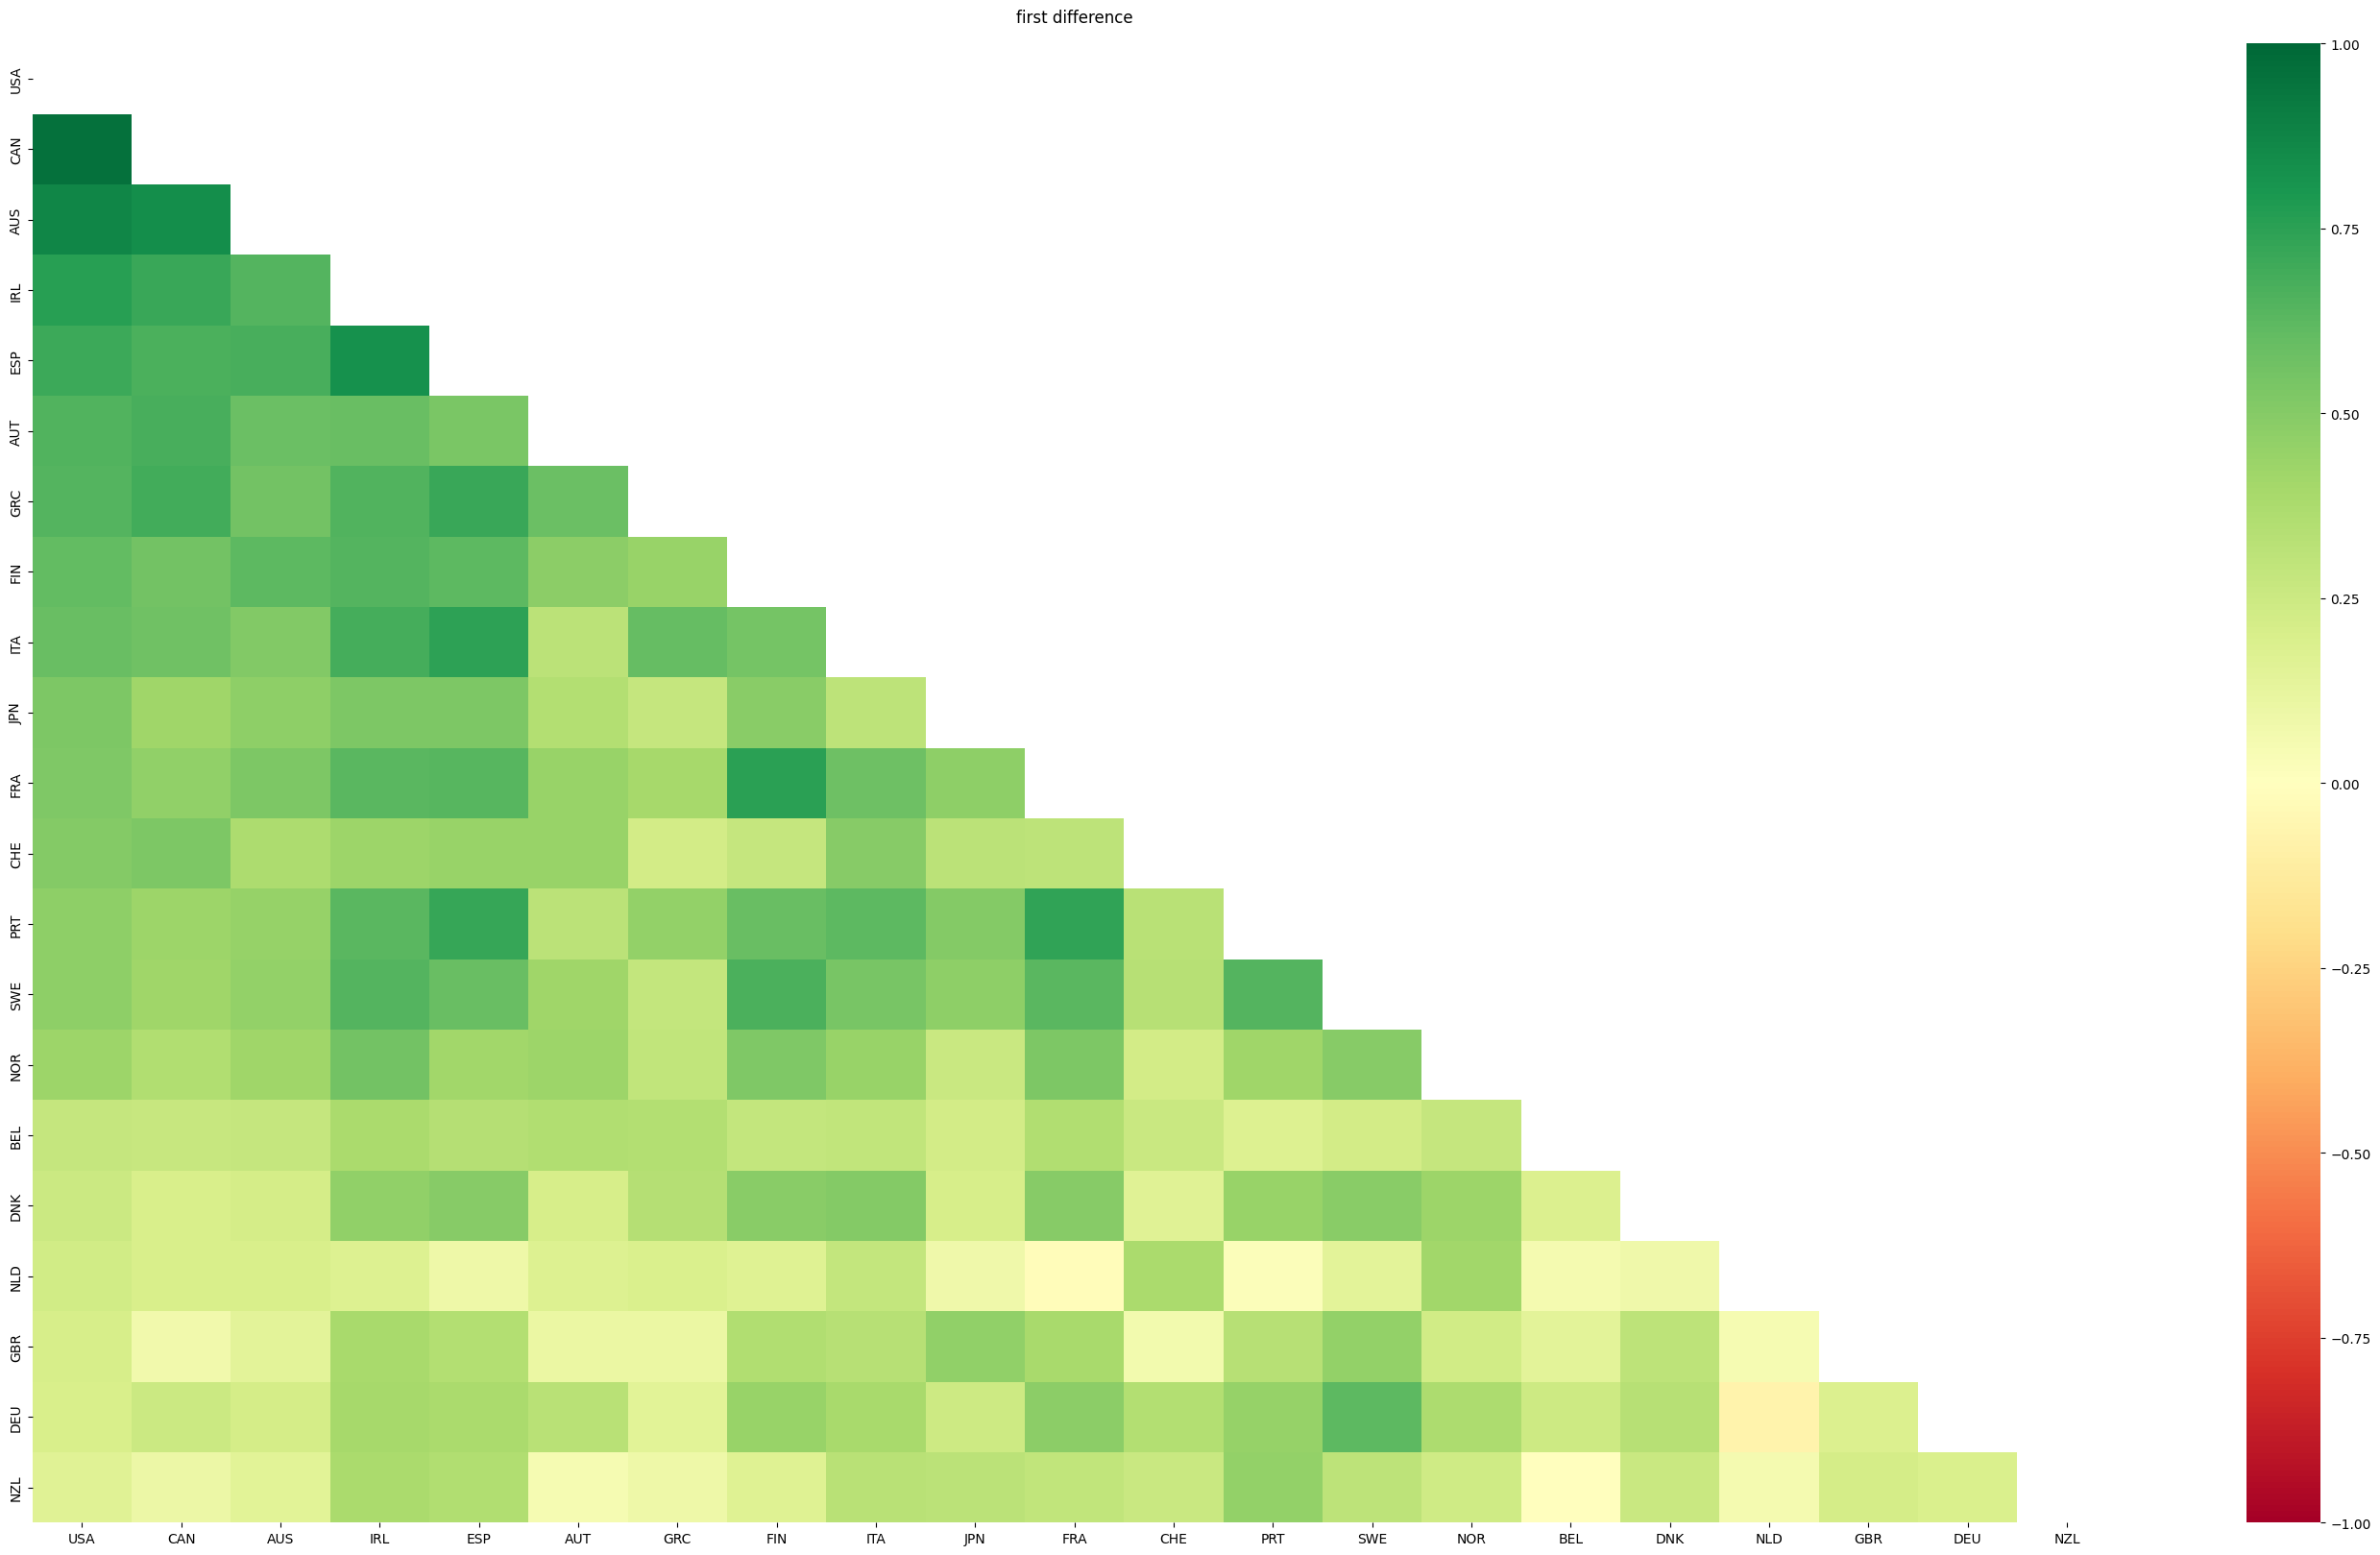

In [106]:
# show the heatmap visualisation

oecdemploymentheatmap = oecdemploymentdetrend.get_heatmap()

In [107]:
# show the reshaped version: 

oecdemploymentreshaped = oecdemploymentdetrend.get_organized()

oecdemploymentreshaped.tail()


iso3_firstcountry iso3_secondcountry  correlation
376               NLD                DEU    -0.073146
377               NLD                NZL     0.061160
397               GBR                DEU     0.186084
398               GBR                NZL     0.214021
419               DEU                NZL     0.191793

## IMF data: industrial production index, linear detrending

double check if i'm using the right data (should have a nice full series for all the countries?)

In [108]:
imfipidetrend = pc.Prepare_Correlations(imfipi, detrending="linear detrending", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

imfipidetrend.data.tail()

AUT       AUS       BEL       CAN       CHE       DEU  \
date                                                                     
2020-10-01 -0.025409 -0.004551 -0.024625  0.012318 -0.020333 -0.053564   
2021-01-01 -0.015818 -0.053862  0.013492  0.021887  0.017126 -0.059146   
2021-04-01 -0.005883 -0.057197  0.098616  0.015283  0.039161 -0.067846   
2021-07-01  0.012246 -0.062273  0.085135  0.028318  0.031478 -0.098038   
2021-10-01  0.051735 -0.068893  0.058698  0.042329  0.025140 -0.075606   

                 DNK       ESP       FIN       FRA       GBR       GRC  \
date                                                                     
2020-10-01  0.018416  0.062526 -0.000136  0.009615  0.125400  0.084492   
2021-01-01  0.062995  0.070603  0.014578  0.010167  0.125317  0.139382   
2021-04-01  0.059700  0.060519  0.019299  0.007665  0.127677  0.161779   
2021-07-01  0.108732  0.060141  0.038375  0.008892  0.123620  0.180184   
2021-10-01  0.148337  0.094714  0.069005  0.010458  0.110280  0.214566   

                 IRL       ITA       JPN       NLD       NOR       NZL  \
date                                                                     
2020-10-01  0.238299  0.038333 -0.045025 -0.040450  0.038247  0.009412   
2021-01-01  0.307168  0.062543 -0.016733 -0.025389  0.072962  0.013371   
2021-04-01  0.255422  0.071672 -0.015054 -0.011545  0.079603  0.033684   
2021-07-01  0.303085  0.085860 -0.033930 -0.004306  0.110702 -0.035773   
2021-10-01  0.278517  0.098044 -0.025227 -0.001597  0.084794  0.007659   

                 PRT       SWE       USA  
date                                      
2020-10-01  0.059891  0.039099 -0.037263  
2021-01-01  0.053977  0.055399 -0.030721  
2021-04-01  0.023516  0.063547 -0.016220  
2021-07-01  0.023706  0.059056 -0.008840  
2021-10-01  0.055126  0.075011  0.001608

In [109]:
# show the correlation matrix

imfipimatrix = imfipidetrend.get_correlationmatrix()

imfipimatrix

USA       JPN       DEU       FRA       AUT       ITA       SWE  \
USA  1.000000  0.841215  0.799439  0.768083  0.714980  0.596314  0.558480   
JPN  0.841215  1.000000  0.801586  0.791771  0.792534  0.709933  0.718626   
DEU  0.799439  0.801586  1.000000  0.682123  0.789947  0.479366  0.448587   
FRA  0.768083  0.791771  0.682123  1.000000  0.780210  0.909149  0.809095   
AUT  0.714980  0.792534  0.789947  0.780210  1.000000  0.742915  0.787830   
ITA  0.596314  0.709933  0.479366  0.909149  0.742915  1.000000  0.897600   
SWE  0.558480  0.718626  0.448587  0.809095  0.787830  0.897600  1.000000   
ESP  0.531214  0.676468  0.351775  0.836748  0.669366  0.923013  0.889111   
NZL  0.523404  0.687526  0.387898  0.689244  0.552898  0.672175  0.662563   
PRT  0.462413  0.526182  0.279313  0.815201  0.465292  0.852652  0.706480   
CAN  0.444726  0.296583  0.140142  0.574169  0.096185  0.508371  0.336719   
FIN  0.444380  0.670424  0.448972  0.614427  0.802830  0.728799  0.877874   
AUS  0.438057  0.641060  0.732564  0.442721  0.776198  0.364078  0.513136   
DNK  0.432231  0.434336  0.090545  0.675478  0.417886  0.783362  0.761218   
NLD  0.426010  0.578133  0.659523  0.365975  0.704200  0.280573  0.393149   
BEL  0.399130  0.587378  0.549831  0.473301  0.806719  0.535613  0.651649   
CHE  0.361861  0.425711  0.461807  0.321851  0.616783  0.403078  0.436841   
GBR  0.195465  0.264084 -0.144580  0.523730  0.237358  0.702308  0.627520   
GRC  0.145447  0.306117 -0.122272  0.488898  0.359276  0.730869  0.731261   
IRL  0.034092  0.072553 -0.224028  0.322194  0.000506  0.486391  0.365902   
NOR -0.016829  0.025367 -0.333578  0.231623  0.016041  0.446874  0.387430   

          ESP       NZL       PRT       CAN       FIN       AUS       DNK  \
USA  0.531214  0.523404  0.462413  0.444726  0.444380  0.438057  0.432231   
JPN  0.676468  0.687526  0.526182  0.296583  0.670424  0.641060  0.434336   
DEU  0.351775  0.387898  0.279313  0.140142  0.448972  0.732564  0.090545   
FRA  0.836748  0.689244  0.815201  0.574169  0.614427  0.442721  0.675478   
AUT  0.669366  0.552898  0.465292  0.096185  0.802830  0.776198  0.417886   
ITA  0.923013  0.672175  0.852652  0.508371  0.728799  0.364078  0.783362   
SWE  0.889111  0.662563  0.706480  0.336719  0.877874  0.513136  0.761218   
ESP  1.000000  0.772422  0.884549  0.446087  0.748525  0.330745  0.815772   
NZL  0.772422  1.000000  0.653816  0.341035  0.549052  0.369952  0.514573   
PRT  0.884549  0.653816  1.000000  0.605532  0.458840  0.094201  0.788741   
CAN  0.446087  0.341035  0.605532  1.000000  0.064512 -0.281459  0.625430   
FIN  0.748525  0.549052  0.458840  0.064512  1.000000  0.694046  0.582556   
AUS  0.330745  0.369952  0.094201 -0.281459  0.694046  1.000000  0.000622   
DNK  0.815772  0.514573  0.788741  0.625430  0.582556  0.000622  1.000000   
NLD  0.209771  0.394509 -0.028392 -0.290016  0.556763  0.804691 -0.071664   
BEL  0.455386  0.383369  0.179223 -0.214851  0.763579  0.824993  0.212205   
CHE  0.274030  0.074858  0.076628 -0.227830  0.564283  0.575408  0.086634   
GBR  0.802011  0.546034  0.782761  0.500893  0.439161 -0.145616  0.811494   
GRC  0.826203  0.526155  0.702214  0.336865  0.643548  0.012233  0.809533   
IRL  0.561872  0.315146  0.594617  0.463146  0.152595 -0.332036  0.636689   
NOR  0.539221  0.292941  0.550058  0.371440  0.267279 -0.343591  0.660222   

          NLD       BEL       CHE       GBR       GRC       IRL       NOR  
USA  0.426010  0.399130  0.361861  0.195465  0.145447  0.034092 -0.016829  
JPN  0.578133  0.587378  0.425711  0.264084  0.306117  0.072553  0.025367  
DEU  0.659523  0.549831  0.461807 -0.144580 -0.122272 -0.224028 -0.333578  
FRA  0.365975  0.473301  0.321851  0.523730  0.488898  0.322194  0.231623  
AUT  0.704200  0.806719  0.616783  0.237358  0.359276  0.000506  0.016041  
ITA  0.280573  0.535613  0.403078  0.702308  0.730869  0.486391  0.446874  
SWE  0.393149  0.651649  0.436841  0.627520  0.731261  0.365902  0.387430  
ESP  0.20977

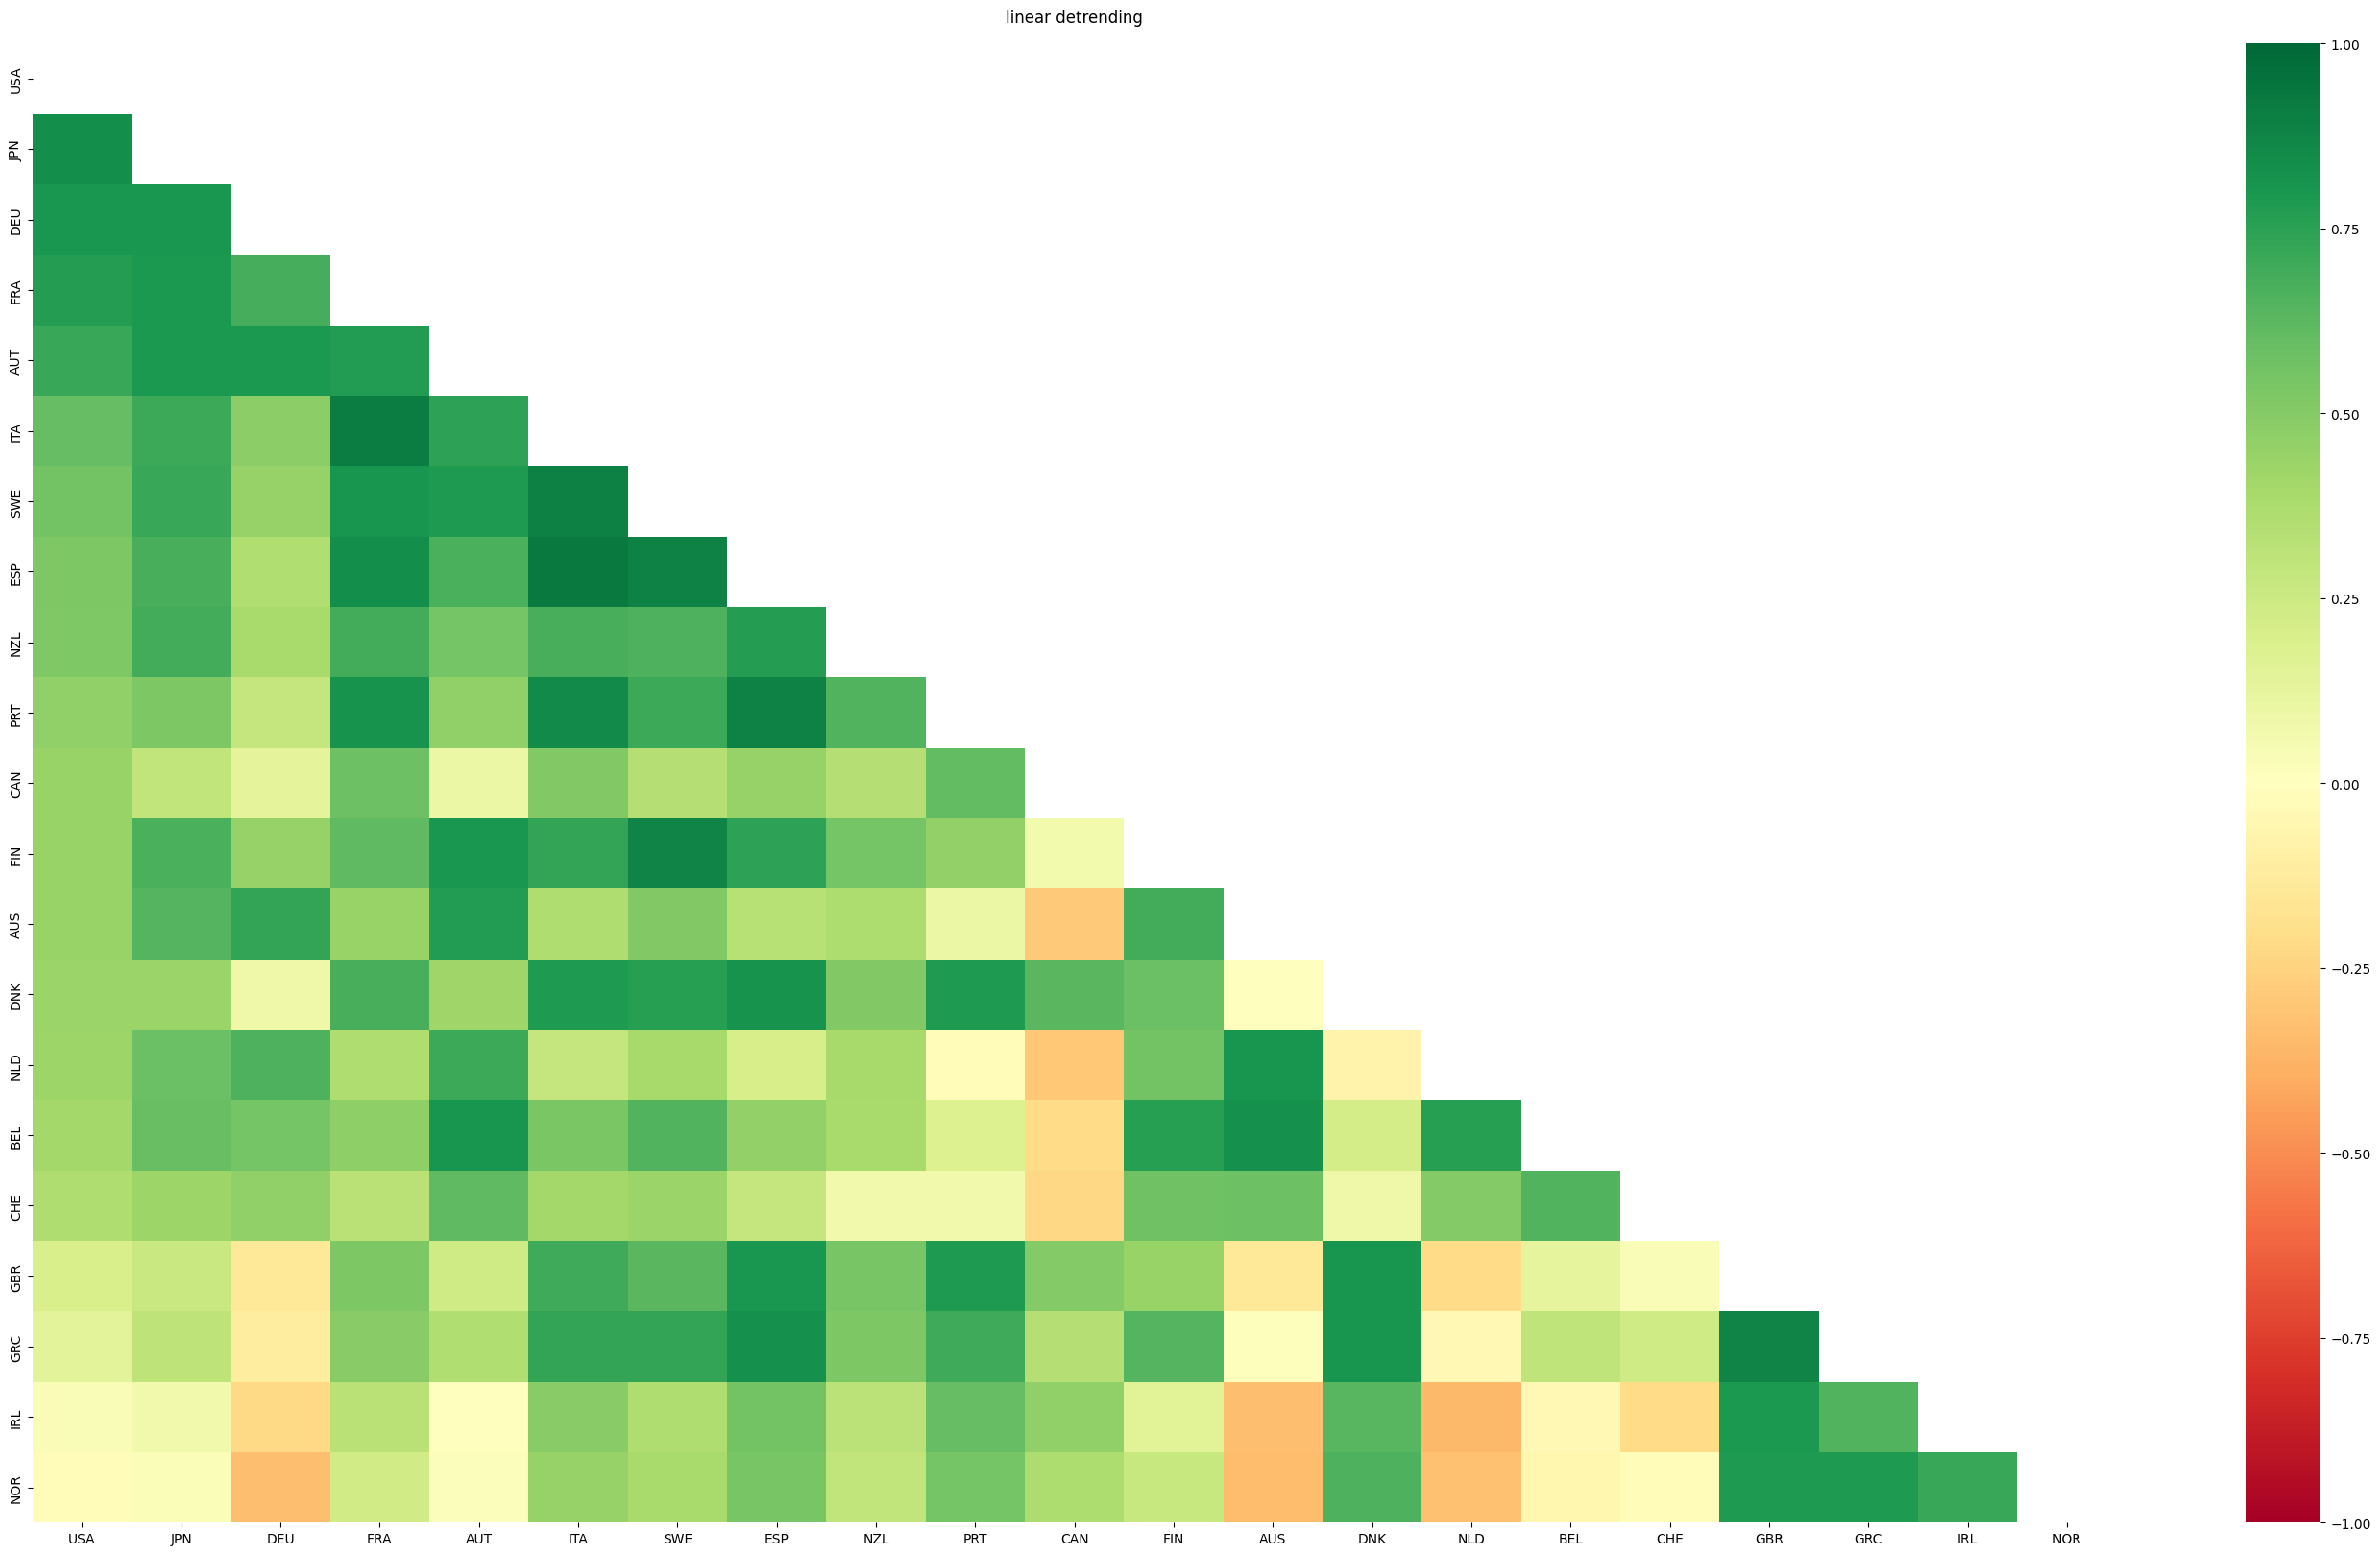

In [110]:
# show the heatmap visualisation

imfipiheatmap = imfipidetrend.get_heatmap()

In [111]:
# show the reshaped version: 

imfipireshaped = imfipidetrend.get_organized()

imfipireshaped.tail()


iso3_firstcountry iso3_secondcountry  correlation
376               GBR                IRL     0.792504
377               GBR                NOR     0.784399
397               GRC                IRL     0.654386
398               GRC                NOR     0.786516
419               IRL                NOR     0.718233

# look at some missing values that can cause issues with scipy linear detrending

In [112]:
lookatnansimf = imfipi[list(set(imfipi.columns) & set(frankelrosecountries))]
lookatnansimf = lookatnansimf.loc[(lookatnansimf.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansimf.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansimf[lookatnansimf.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_9668\2327253042.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansimf[lookatnansimf.isna().any(1)]


AUS        NZL         CAN        DEU        IRL  \
date                                                                 
1998-01-01  67.916615  85.362776  101.039949  84.826325  51.734178   
1998-04-01  68.744976  84.820189  101.570927  84.972578  51.828354   
1998-07-01  68.322775  84.807571  102.336458  85.228519  55.438445   
1998-10-01  68.571471  83.722397  103.964121  83.912249  55.877935   
1999-01-01  69.556634  85.526814  105.631622  84.277879  59.017145   
1999-04-01  68.320594  84.302839  106.908397  85.082267  58.420695   
1999-07-01  68.908120  86.410095  108.687344  86.142596  63.223686   
1999-10-01  69.324403  88.656151  110.607653  87.202925  65.986190   

                   GBR         NOR         FRA        NLD        BEL  \
date                                                                   
1998-01-01   97.868837  117.238018  100.424965  81.914914  71.294644   
1998-04-01   96.954175  117.238018  101.791517  82.751631  71.790391   
1998-07-01   94.978505  114.508530  101.291559  82.871639  71.439237   
1998-10-01   95.417543  114.768481  101.924840  82.871639  70.884964   
1999-01-01   99.259124  113.631194  101.724856  84.125047  70.451185   
1999-04-01   99.661575  112.461413  103.224731  84.211719  71.136280   
1999-07-01  101.820177  115.418359  104.224648  85.411791  72.482372   
1999-10-01  102.588494  116.295695  106.557787  86.518524  73.993712   

                  USA        SWE         JPN         DNK         ESP  \
date                                                                   
1998-01-01  92.451261  90.301261  100.808097  102.236210  108.585343   
1998-04-01  93.067178  91.533469   97.774200  101.981494  109.496505   
1998-07-01  93.757430  93.428913   96.567537  111.037223  109.465085   
1998-10-01  95.116695  92.930643   95.912491   96.263688  110.784699   
1999-01-01  95.806203  93.065311   97.326011  103.502188  110.470505   
1999-04-01  96.733441  93.361579   97.291535  100.206085  111.161731   
1999-07-01  97.599973  93.795882   98.705055  100.244102  113.109732   
1999-10-01  99.324434  95.492692  100.049622  108.463450  114.837798   

                   PRT        AUT        CHE  GRC        FIN         ITA  
date                                                                      
1998-01-01  111.762827  66.118755  73.800515  NaN  82.654978  114.427091  
1998-04-01  113.532586  67.042201  73.564419  NaN  83.907326  114.767280  
1998-07-01  113.002572  68.076461  73.756977  NaN  83.406387  113.901345  
1998-10-01  113.276717  68.002586  72.846849  NaN  83.187226  112.602443  
1999-01-01  115.372403  68.187275  73.370437  NaN  84.721353  112.571517  
1999-04-01  116.679161  70.440484  74.686600  NaN  86.192862  111.829287  
1999-07-01  115.905463  71.326992  76.711255  NaN  86.067627  114.210608  
1999-10-01  117.644761  75.353218  79.397507  NaN  88.415780  115.942477

In [113]:
lookatnansoecd = oecdemployment[list(set(oecdemployment.columns) & set(frankelrosecountries))]
lookatnansoecd = lookatnansoecd.loc[(lookatnansoecd.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd[lookatnansoecd.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_9668\1990012608.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd[lookatnansoecd.isna().any(1)]


AUS       NZL       CAN       DEU       IRL       GBR  \
date                                                                     
1998-01-01  67.52501  69.64523  68.53333       NaN       NaN  71.27648   
1998-04-01  67.72712  69.02686  68.73333       NaN       NaN  71.27740   
1998-07-01  67.87543  68.99280  69.06667       NaN       NaN  71.56174   
1998-10-01  68.03833  68.63832  69.36667       NaN       NaN  71.78155   
1999-01-01  67.99295  69.25211  69.63333       NaN       NaN  71.85828   
1999-04-01  68.06286  69.20969  69.86667       NaN  63.08013  71.88622   
1999-07-01  68.26156  69.55880  70.13333       NaN  63.77315  72.11771   
1999-10-01  68.55666  70.19769  70.50000       NaN  64.18932  72.27470   
2000-01-01  68.51775  70.00667  70.86667       NaN  64.62188  72.26537   
2000-04-01  69.11346  69.70486  70.90000       NaN  65.12254  72.47532   
2000-07-01  69.65776  70.58637  70.83334       NaN  65.43256  72.62865   
2000-10-01  69.05281  71.03185  71.13333       NaN  65.54397  72.49927   
2001-01-01  68.90614  71.02847  71.03333       NaN  65.73882  72.64088   
2001-04-01  69.13638  71.26887  70.93333       NaN  65.72372  72.67834   
2001-07-01  69.03412  71.34315  70.73333       NaN  66.00138  72.52940   
2001-10-01  68.97222  71.87128  70.60000       NaN  65.83277  72.58215   
2002-01-01  69.04012  72.33869  70.70000       NaN  65.62794  72.45824   
2002-04-01  69.08331  72.08315  71.20000       NaN  65.59035  72.68372   
2002-07-01  69.42062  71.89165  71.70000       NaN  65.34321  72.57182   
2002-10-01  69.77445  72.07507  71.86667       NaN  65.26238  72.87263   
2003-01-01  70.15435  71.84675  72.20000       NaN  65.29475  72.68249   
2003-04-01  69.85239  71.87396  71.96667       NaN  65.49341  72.88149   
2003-07-01  69.85621  72.58069  72.10000       NaN  65.40244  72.78049   
2003-10-01  70.07053  72.33250  72.36667       NaN  65.80630  72.76896   
2004-01-01  69.98949  72.52114  72.40000       NaN  66.04763  73.03226   
2004-04-01  70.17773  72.64518  72.56667       NaN  65.96355  72.87817   
2004-07-01  70.18633  73.27805  72.46667       NaN  66.28184  72.86763   
2004-10-01  70.79048  74.23460  72.50000       NaN  66.81186  73.04147   
2005-01-01  71.17284  73.72599  72.50000  65.19444  67.18142  73.07851   
2005-07-01  71.71696  74.61337  72.43333  65.52340  67.89343  73.04482   
2005-10-01  71.61115  74.73241  72.53333  65.89368  67.99429  72.67564   
2006-01-01  71.63677  74.79125  72.66666  66.40794  68.48476  72.90321   
2006-07-01  72.41850  74.71667  72.90000  67.47513  68.71059  72.81538   
2006-10-01  72.43217  74.43260  72.93333  67.78170  69.00396  72.70507   
2007-01-01  72.48233  74.97935  73.33334  68.48769  71.80500  72.50254   
2007-07-01  72.88493  74.92579  73.56667  69.18359  71.83748  72.68157   
2007-10-01  73.05742  75.32039  73.66666  69.36181  71.50362  72.90926   
2008-01-01  73.23535  73.80699  73.73333  69.81321  71.05537  72.97685   
2008-07-01  73.18696  74.70612  73.33334  70.35694  69.35559  72.43549   
2008-10-01  73.00626  74.73986  73.20000  70.43853  67.93954  72.17339   
2009-01-01  72.46388  73.33380  72.13333  68.92602  65.18101  71.67367   
2009-07-01  71.73881  72.20524  71.13333  69.37293  63.03948  70.61582   
2009-10-01  71.92466  72.15321  71.26667  70.21363  62.26198  70.55235   

                 NOR       FRA       NLD       BEL       USA       SWE  \
date                                                                     
1998-01-01       NaN       NaN       NaN       NaN  73.76123       NaN   
1998-04-01       NaN       NaN       NaN       NaN  73.85174       NaN   
1998-07-01       NaN       NaN       NaN       NaN  73.81988       NaN   
1998-10-01       NaN       NaN       NaN       NaN  73.94733       NaN   
1999-01-01       NaN       NaN       NaN  59.19458  73.98900       NaN   
1999-04-01       NaN       NaN       NaN  59.02541  73.89811       NaN   
1999-07-01       NaN       NaN       NaN  59.54280  73.86941       NaN   
1999-10-01       NaN

# regressions demo: working with shares data

In [114]:
# import the shares data (original version)
shares_original = pd.read_pickle(cleandatapath+'FullData_OriginalData_plusExports.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (alternative version)
shares_alt = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_TSimportShares_Taiwan.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (edited version of original)
shares_altoriginal = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_CorrectedOriginalVersion.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# organize shares data
dataversions = [shares_original, shares_alt, shares_altoriginal]
dataversions_names = ['original', 'alt', 'altoriginal']
sharesdata_dict = dict.fromkeys(dataversions_names)

# put the 3 versions of the data in their own dictionary entries
for i, version in enumerate(dataversions):
    # taking the same year range as the correlation data and only using one obs per year since it is annual data
    # only consider countries that we calculated correlation coefficients for
    version = version[(version['iso3'].isin(original_countries_iso3)) & ((version['year'] >= 1990) & (version['year'] <= 2021))].groupby(['iso3', 'year']).first().reset_index()
    # getting the averages
    version = version[['iso3', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']].groupby(['iso3'], as_index=False).mean()
    version = version.dropna()
    version.name = dataversions_names[i]
    # print(version)
    
    sharesdata_dict[version.name] = version

# import consumption, centrality and nominal gdp shares
cons_ngdp_cent = pd.read_pickle(cleandatapath+'cons_ngdp_cent_for_regression.pkl')
# taking the same year range as the correlation data
# only consider countries that we calculated correlation coefficients for
cons_ngdp_cent = cons_ngdp_cent[(cons_ngdp_cent['iso3'].isin(original_countries_iso3)) & ((cons_ngdp_cent['year'] >= 1990) & (cons_ngdp_cent['year'] <= 2021))]

worldcons = cons_ngdp_cent[['year', 'iso3', 'worldtotcons', 'totcons']]
cent = cons_ngdp_cent[['year', 'iso3', 'cent_exp']]
ngdpshares = cons_ngdp_cent[['year', 'iso3', 'gdpshare']]

# import gravity model data from CEPII
cepii_data = pd.read_stata(gravitydatapath + 'Gravity_filtered.dta')
cepii_data.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)

# import bti
bti = pd.read_pickle(cleandatapath+'bti_for_regression.pkl')
# find average across years for each pair
bti = bti[['iso3_o', 'iso3_d', 'bti']].groupby(['iso3_o', 'iso3_d'], as_index=False).mean()

In [115]:
# get data for each calculation method:
correlations_covariates_original = {}
correlations_covariates_alt = {}
correlations_covariates_altoriginal = {}

for method in dataversions_names:
    for data in correlationdata_dict:
        merged = reg.prepare_shares(correlation_data=correlationdata_dict[data], shares_data=sharesdata_dict, version=method)

        # make columns
        merged['prod_worldconscorr'] = np.nan
        merged['prod_ngdpshare'] = np.nan
        merged['prod_cent'] = np.nan

        # calculate covariates for each row (which already has each unique country pair)
        for index, row in merged.iterrows():
            countryA = row['iso3_firstcountry']
            countryB = row['iso3_secondcountry']

            worldcorr_countryA = worldcons[worldcons['iso3'] == countryA][['totcons', 'worldtotcons']].corr()['totcons'][-1]
            worldcorr_countryB = worldcons[worldcons['iso3'] == countryB][['totcons', 'worldtotcons']].corr()['totcons'][-1]
            ngdpshare_countryA = ngdpshares[ngdpshares['iso3'] == countryA]['gdpshare'].mean()
            ngdpshare_countryB = ngdpshares[ngdpshares['iso3'] == countryB]['gdpshare'].mean()
            cent_countryA = cent[cent['iso3'] == countryA]['cent_exp'].mean()
            cent_countryB = cent[cent['iso3'] == countryB]['cent_exp'].mean()

            merged.at[index, 'prod_worldconscorr'] = worldcorr_countryA*worldcorr_countryB
            merged.at[index, 'prod_ngdpshare'] = ngdpshare_countryA*ngdpshare_countryB
            merged.at[index, 'prod_cent'] = cent_countryA*cent_countryB
            
        # merge bti with correlation data
        bti.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)
        merged = pd.merge(left=merged, right=bti, on=['iso3_firstcountry', 'iso3_secondcountry'], how='left')
        
        # add CEPII to our data
        merged = pd.merge(left=merged, right=cepii_data, how='left', on=['iso3_firstcountry', 'iso3_secondcountry'])
        
        if method == 'alt':
            correlations_covariates_alt[data] = merged
            correlations_covariates_alt[data].name = data + ', ' + method + ' shares calculation'
        elif method == 'original':
            correlations_covariates_original[data] = merged
            correlations_covariates_original[data].name = data + ', ' + method + ' shares calculation'
        elif method == 'altoriginal':
            correlations_covariates_altoriginal[data] = merged
            correlations_covariates_altoriginal[data].name = data + ', ' + method + ' shares calculation'

In [116]:
correlations_covariates_alt['Real GDP, HP Filter']

iso3_firstcountry iso3_secondcountry  correlation  prod_import  \
0                 USA                BEL     0.907854     0.163271   
1                 USA                GBR     0.888706     0.141749   
2                 BEL                GBR     0.938824     0.109904   
3                 USA                FRA     0.857161     0.083173   
4                 BEL                FRA     0.953072     0.755928   
..                ...                ...          ...          ...   
491               KOR                IDN     0.287447     0.126408   
492               BRA                IDN     0.391325     0.039278   
493               TWN                IDN    -0.045611     0.070962   
494               GRC                IDN     0.403062     0.065911   
495               IRL                IDN     0.006740     0.097638   

     prod_export  prod_worldconscorr  prod_ngdpshare  prod_cent       bti  \
0       0.124379            0.964634    2.301934e-03   0.000011  0.002281   
1       0.078738            0.920382    1.135822e-02   0.000060  0.006003   
2       0.074427            0.912985    3.896480e-04   0.000011       NaN   
3       0.060411            0.919074    1.346520e-02   0.000053  0.003963   
4       0.773242            0.911688    4.619290e-04   0.000010       NaN   
..           ...                 ...             ...        ...       ...   
491     0.084023            0.932518    1.464085e-04   0.000021  0.007386   
492     0.033300            0.846065    1.876283e-04   0.000007  0.000716   
493     0.163148            0.919972    2.004540e-09        NaN       NaN   
494     0.034975            0.943741    3.679169e-05   0.000003  0.000239   
495     0.093826            0.913355    1.933023e-05   0.000007  0.000226   

      dist  contig  comlang_off   logdist  
0     5904       0            0  8.683385  
1     5585       0            1  8.627840  
2      321       0            0  5.771441  
3     5852       0            0  8.674539  
4      264       1            1  5.575949  
..     ...     ...          ...       ...  
491   5278       0            0  8.571302  
492  15642       0            0  9.657715  
493   3800       0            0  8.242756  
494   9831       0            0  9.193295  
495  12081       0            0  9.399389  

[496 rows x 13 columns]

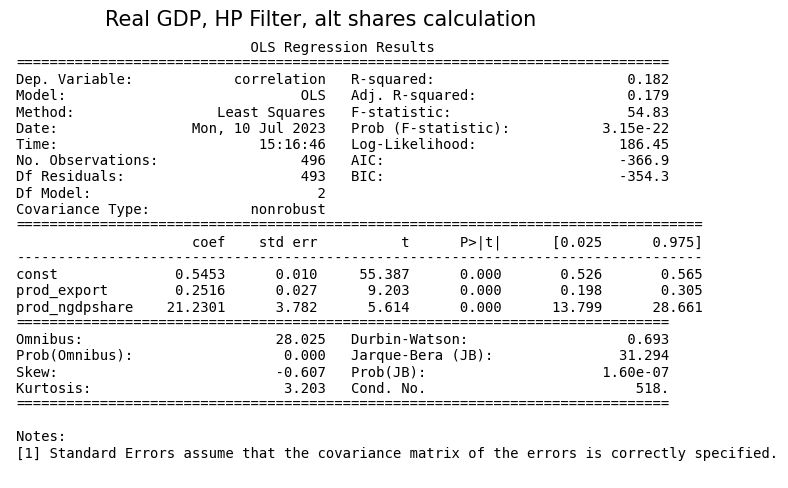

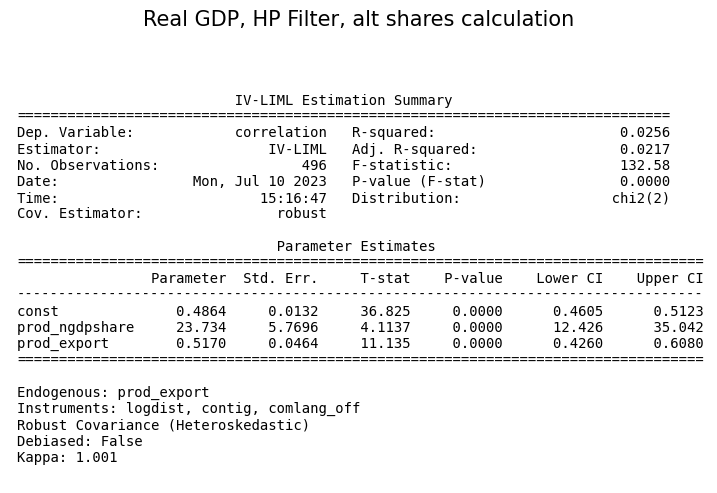

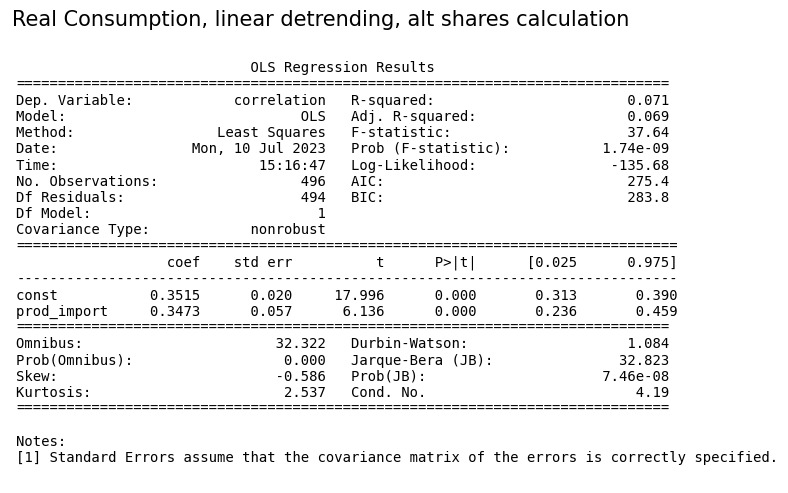

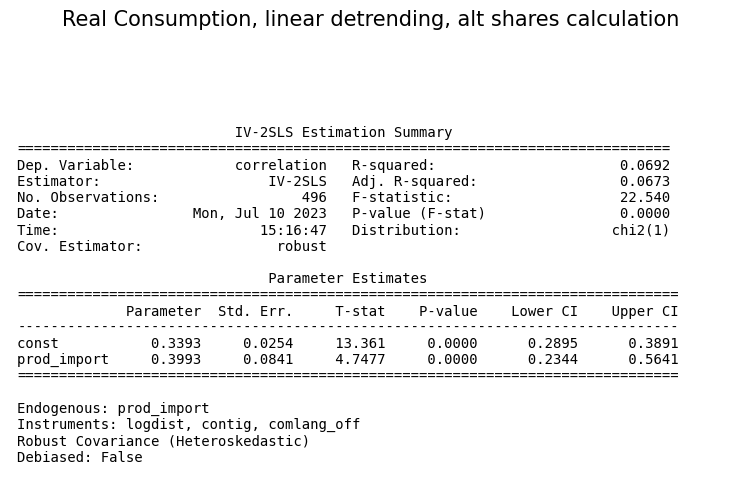

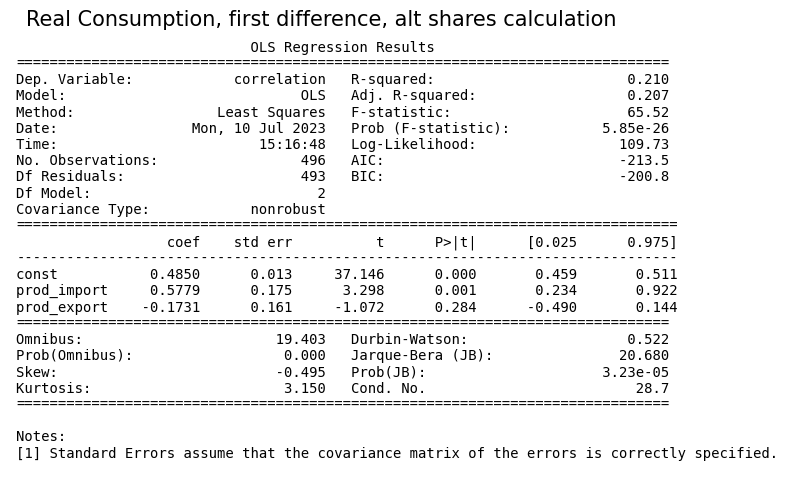

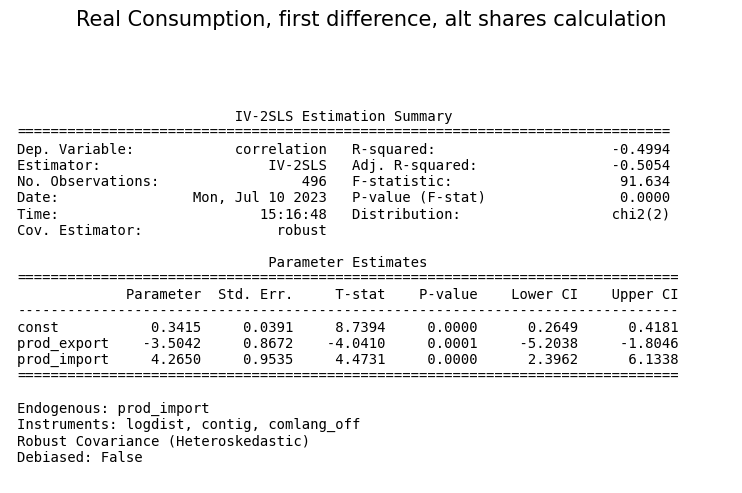

In [141]:
# OLS vs IV ML regressions, real GDP (HP detrended) and alternative share calculations with nominal GDP share product covariate

rgdp_hp_alt_worldcons_ols = reg.Regressions(correlations_covariates_alt['Real GDP, HP Filter']).run_regression(method='OLS', dependent_var=['correlation'], independent_vars=['prod_export', 'prod_ngdpshare'])
rgdp_hp_alt_worldcons_ivml = reg.Regressions(correlations_covariates_alt['Real GDP, HP Filter']).run_regression(method='IV', dependent_var=['correlation'], independent_vars=['prod_ngdpshare'], endog_vars=['prod_export'], instrument_vars=['logdist', 'contig', 'comlang_off'], iv_type='ML')

# OLS vs IV ML regressions, real consumption (linear detrended) and alternative share calculations on a constant
rgdp_lt_alt_ols = reg.Regressions(correlations_covariates_alt['Real Consumption, linear detrending']).run_regression(method='OLS', dependent_var=['correlation'], independent_vars=['prod_import'])
rgdp_lt_alt_ivml = reg.Regressions(correlations_covariates_alt['Real Consumption, linear detrending']).run_regression(method='IV', dependent_var=['correlation'], endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'], iv_type='2SLS')

# OLS vs IV ML regressions, real consumption (first differences) and alternative share calculations on a import and export shares products
rgdp_lt_alt_ols = reg.Regressions(correlations_covariates_alt['Real Consumption, first difference']).run_regression(method='OLS', dependent_var=['correlation'], independent_vars=['prod_import', 'prod_export'])
rgdp_lt_alt_ivml = reg.Regressions(correlations_covariates_alt['Real Consumption, first difference']).run_regression(method='IV', dependent_var=['correlation'], independent_vars=['prod_export'], endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'], iv_type='2SLS')



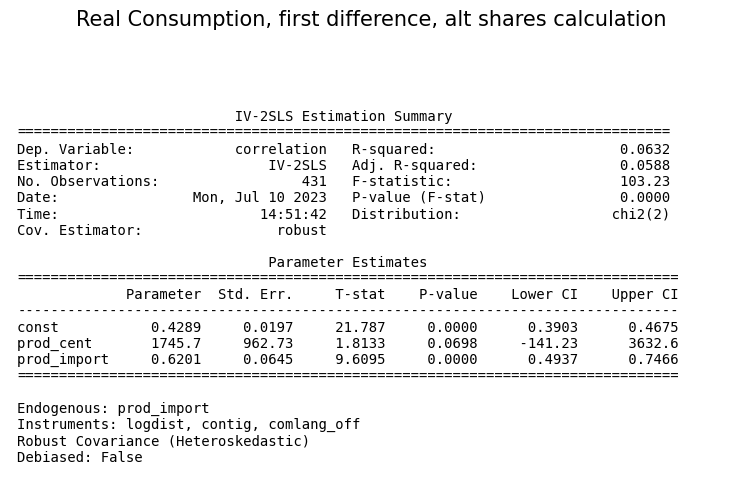

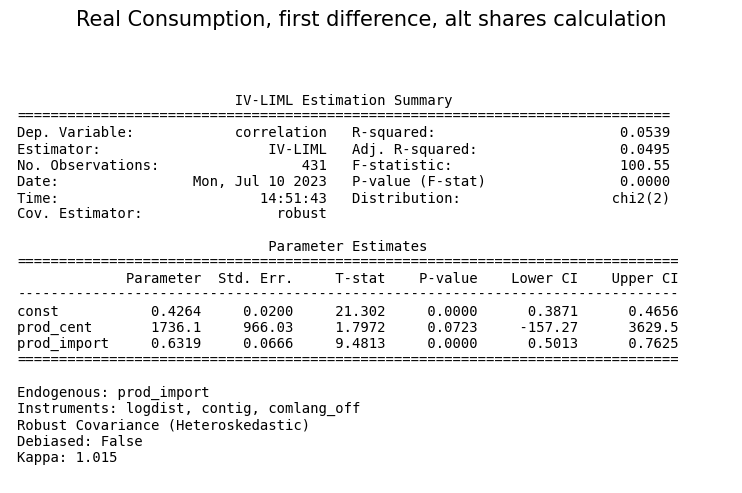

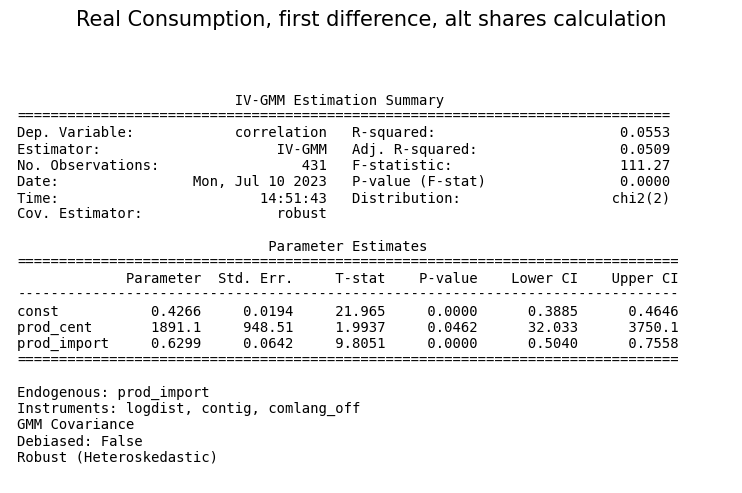

In [118]:
# IV regressions, real consumption (first differences) and alternative share calculations with centrality product covariate, 2SLS vs ML vs GMM
rc_alt_cent_iv2sls = reg.Regressions(correlations_covariates_alt['Real Consumption, first difference']).run_regression(method='IV', dependent_var=['correlation'], independent_vars=['prod_cent'], endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'], iv_type='2SLS')
rc_alt_cent_ivml = reg.Regressions(correlations_covariates_alt['Real Consumption, first difference']).run_regression(method='IV', dependent_var=['correlation'], independent_vars=['prod_cent'], endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'], iv_type='ML')
rc_alt_cent_gmm = reg.Regressions(correlations_covariates_alt['Real Consumption, first difference']).run_regression(method='IV', dependent_var=['correlation'], independent_vars=['prod_cent'], endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'], iv_type='GMM')


# regressions demo: working with frankel and rose data

In [122]:
# import the frankel and rose data (the original data is in a stata dataset)
instruments = pd.read_stata(ocadatapath + 'DATAV4.dta')
instruments.name = 'Normalized by total trade'

# Load dataframe with IMF country code in 'IMF' column and iso3 country code in 'iso3' column
country_code_mapping = pd.read_csv(rawdatapath+'Country_iso_codes.csv')
country_code_mapping = country_code_mapping[['iso3','IMF']]

# Make a dictionary out of the dataframe
dict = country_code_mapping.set_index('IMF').to_dict()['iso3']

# Replace IMF country codes in CountryCode and PartnerCode columns
# by corresponding ISO3 country codes
instruments['count1']= instruments['count1'].map(dict)
instruments['count2']= instruments['count2'].map(dict)

# log distance
instruments['distance'] = np.log(instruments['distance'])

# log trade intensity
instruments['wt'] = np.log(instruments['wt'])

# complete batch of correlations used in paper
versions = ['dy', 'di', 'de', 'du', 'ty', 'ti', 'te', 'tu', 'hy', 'hi', 'he', 'hu', 'sy', 'si', 'se', 'su', 'oy', 'oi', 'oe', 'ou']

# variable descriptions from stata
stata_descriptions = ["Bilateral Output Correlation, Differenced Data", "Bilateral IP Correlation, Differenced Data", "Bilateral Empl'y Correlation, Differenced Data", 
 "Bilateral Unem't Correlation, Differenced Data", "Bilateral Output Correlation, De-Trended Data", "Bilateral IP Correlation, De-Trended Data", 
 "Bilateral Empl'y Correlation, De-Trended Data", "Bilateral Unem't Correlation, De-Trended Data", "Bilateral Output Correlation, HP-Filtered Data", 
 "Bilateral IP Correlation, HP-Filtered Data", "Bilateral Empl'y Correlation, HP-Filtered Data", "Bilateral Unem't Correlation, HP-Filtered Data", 
 "Bilateral Output Correlation, HP-SA Data", "Bilateral IP Correlation, HP-SA Data", "Bilateral Empl'y Correlation, HP-SA Data", 
 "Bilateral Unem't Correlation, HP-SA Data", "Bilateral Output Correlation, Oil De-Trended Data", "Bilateral IP Correlation, Oil De-Trended Data", 
 "Bilateral Empl'y Correlation, Oil De-Trended Data", "Bilateral Unem't Correlation, Oil De-Trended Data"]

# multiply correlation coefficients by 100
for i, version in enumerate(versions):
    instruments[version] = instruments[version]*100

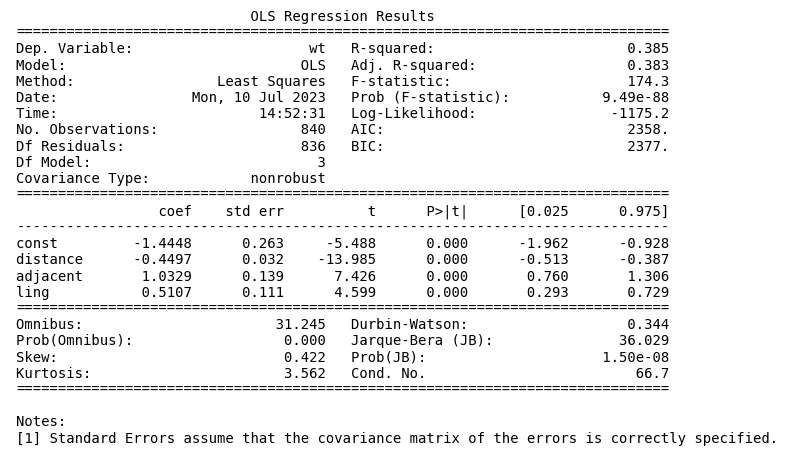

In [123]:
# look at the first stage results
y = instruments[['wt']]
X = instruments[['distance', 'adjacent', 'ling']]
X = sm.add_constant(X)
firststagemodel = sm.OLS(y,X)
firststageresults = firststagemodel.fit()

plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(firststageresults.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()

# not sure what's happening with the magnitude of estimated coefficients for first stage
# missing one of the transformations maybe?

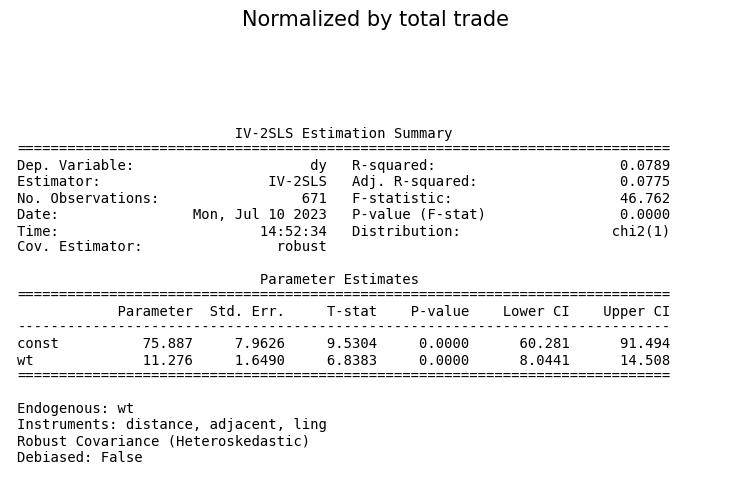

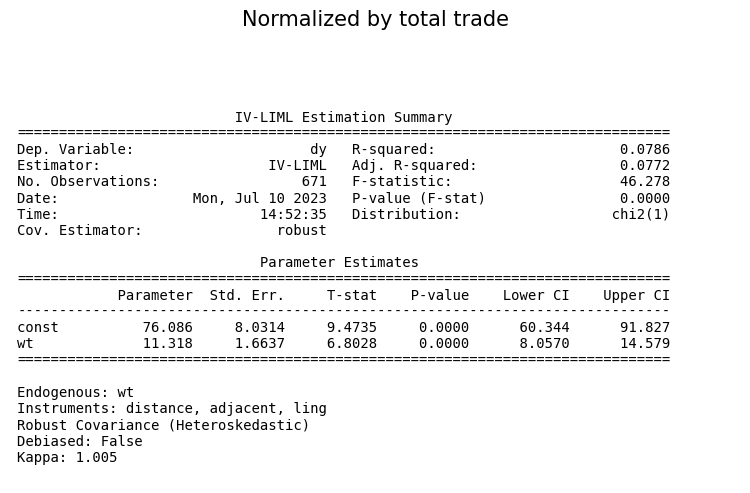

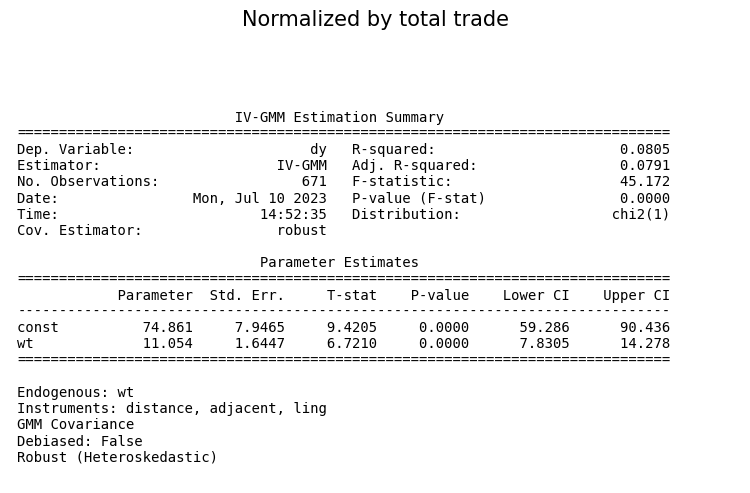

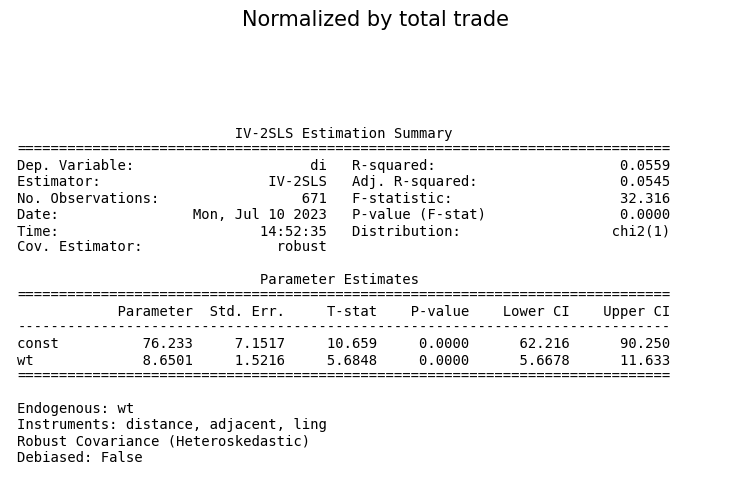

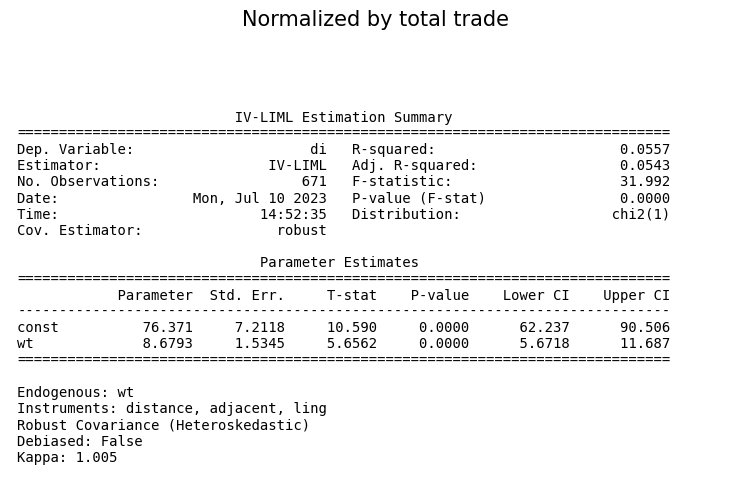

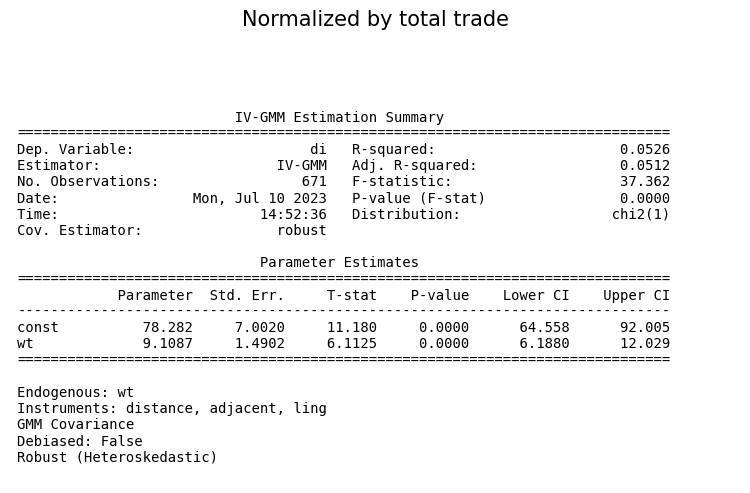

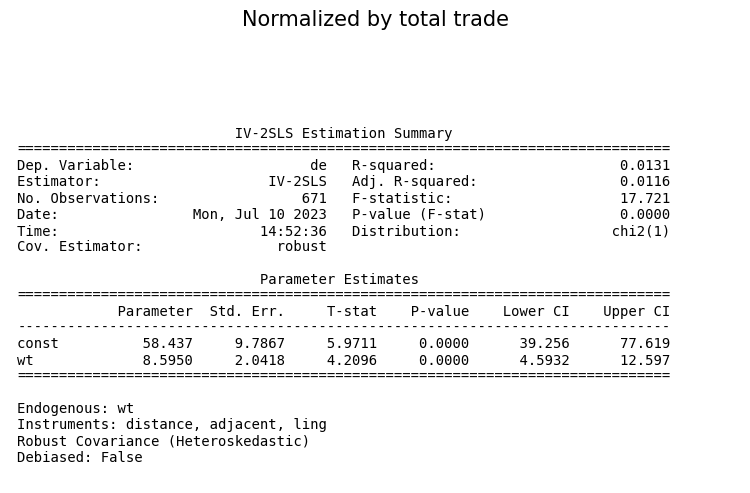

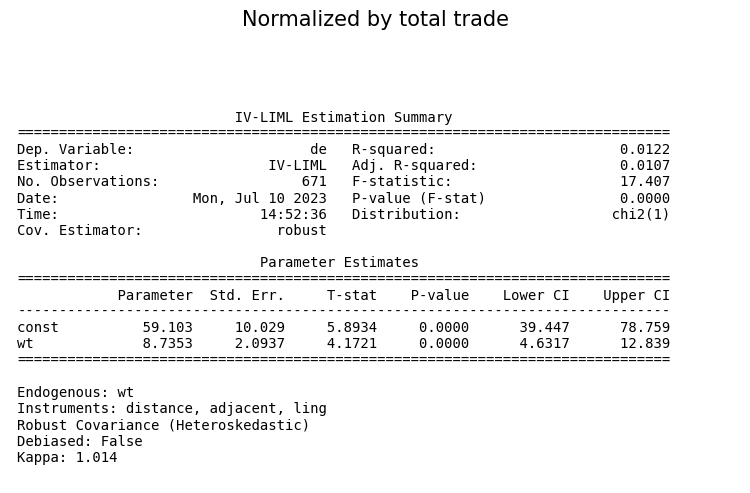

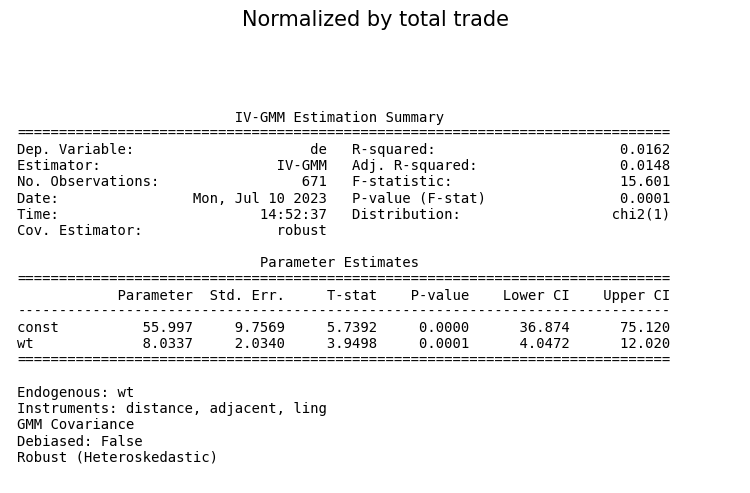

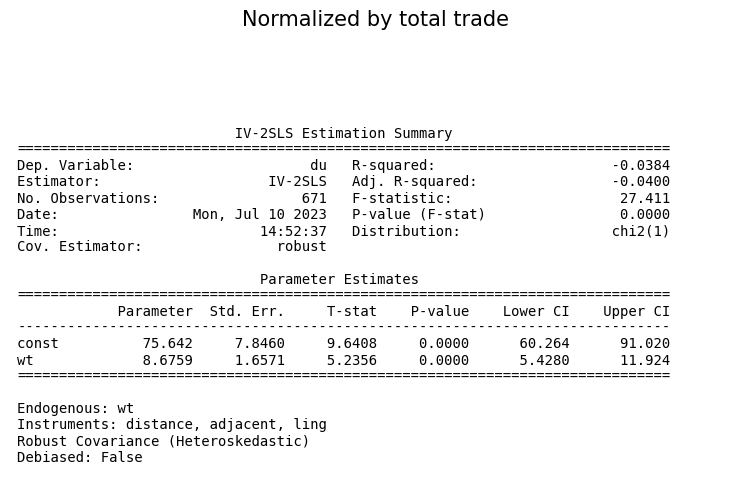

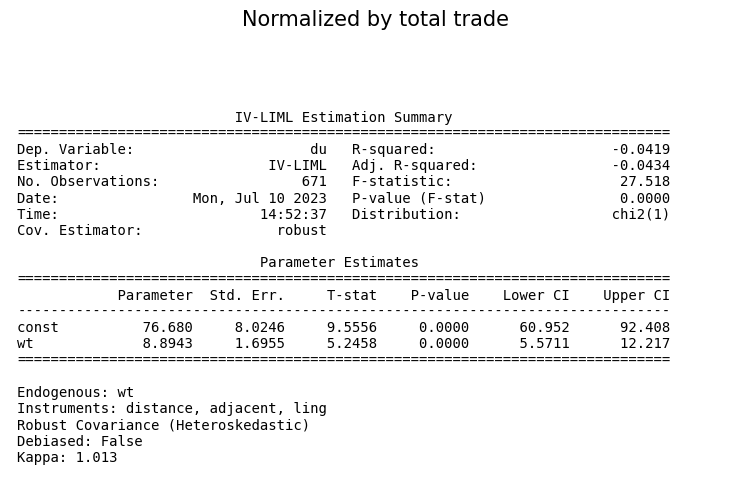

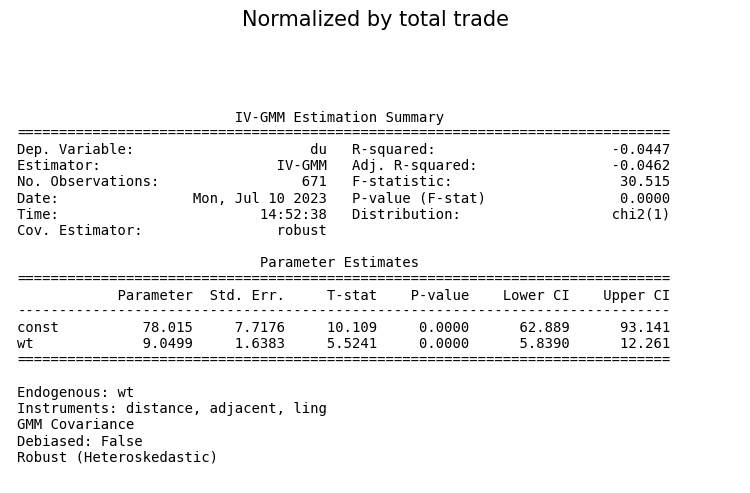

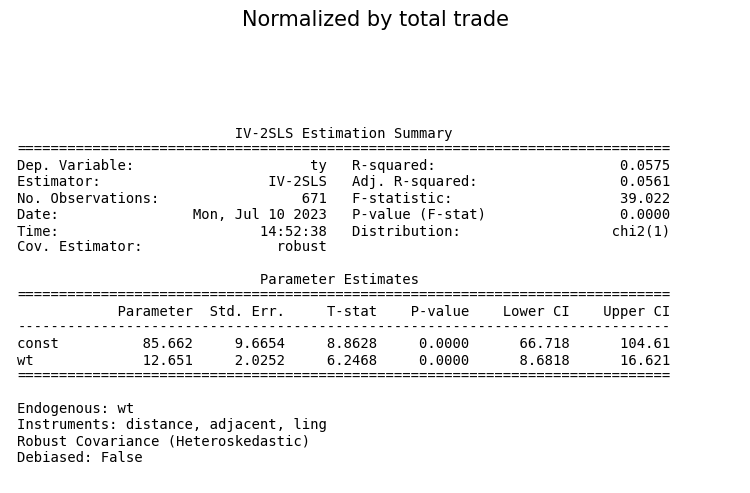

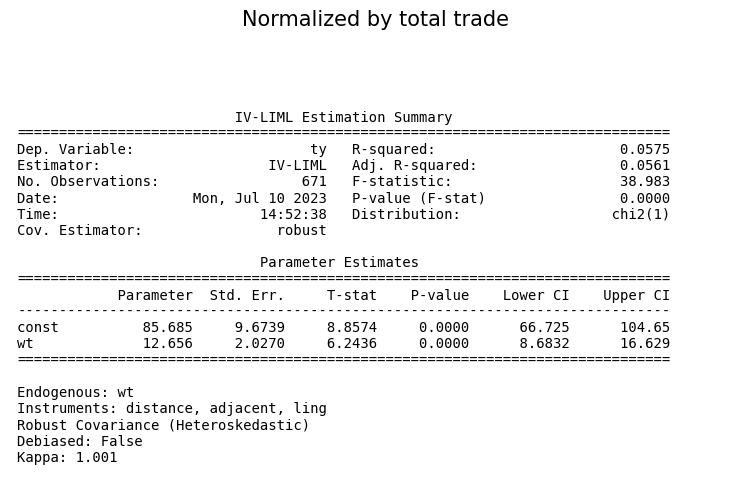

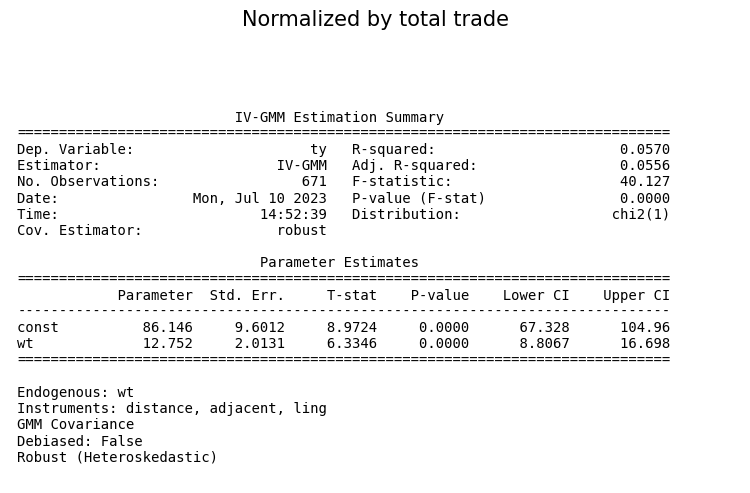

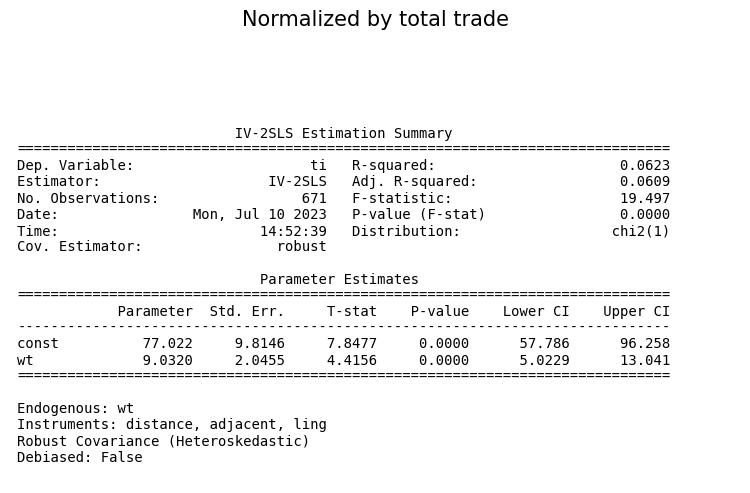

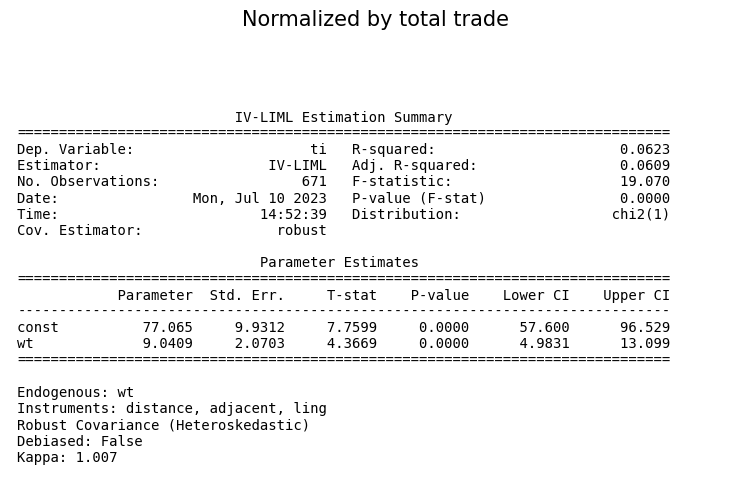

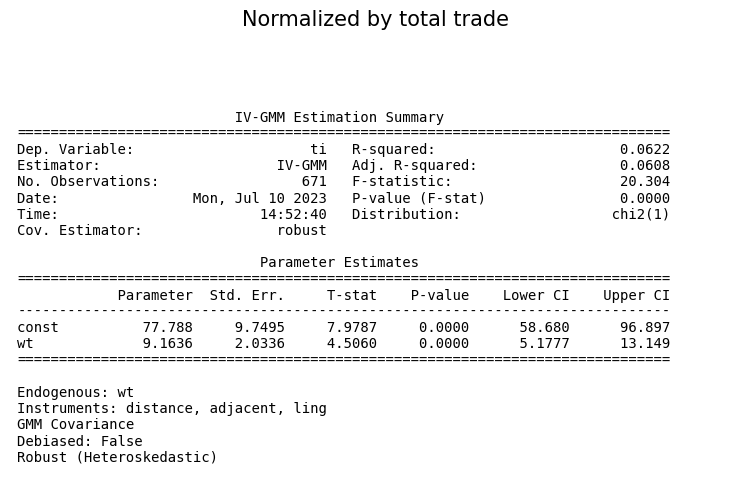

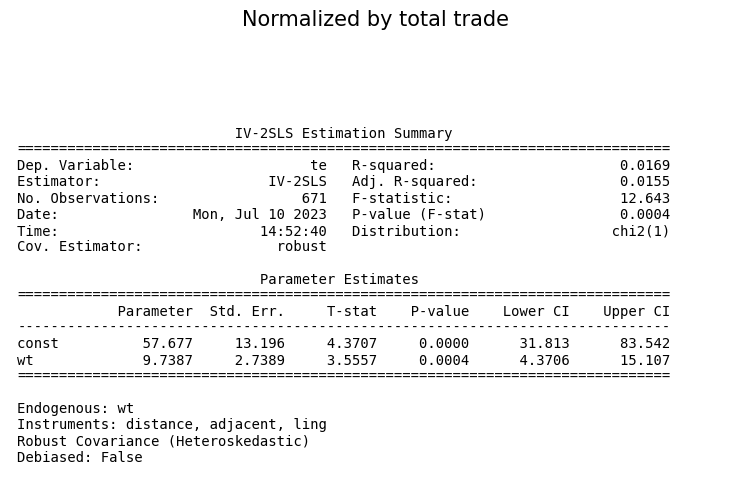

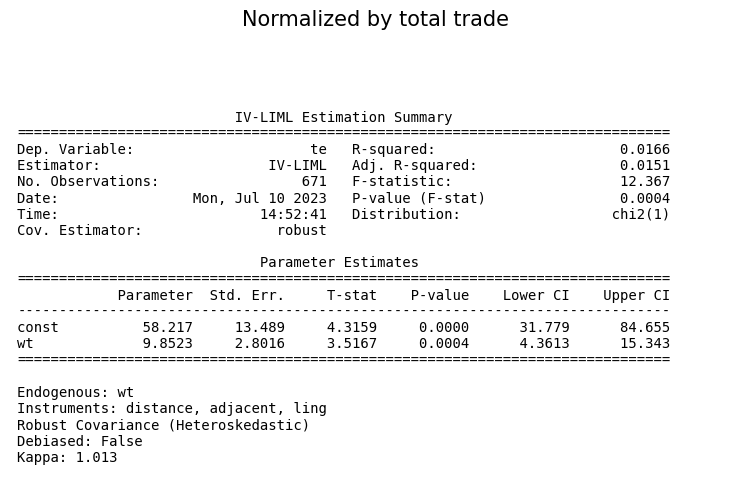

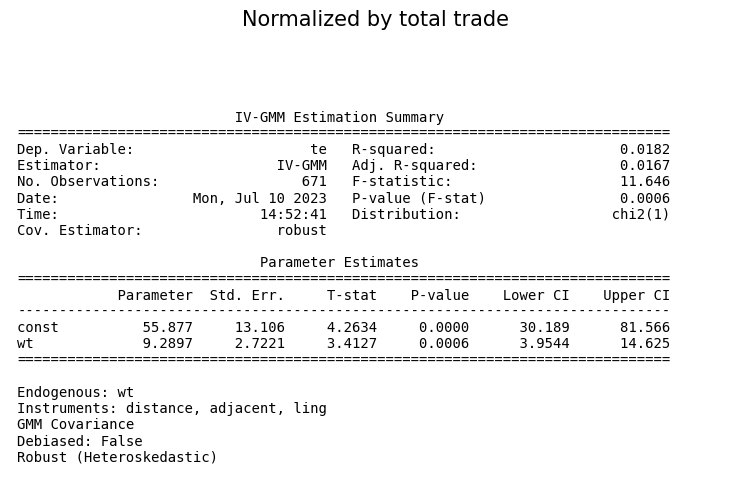

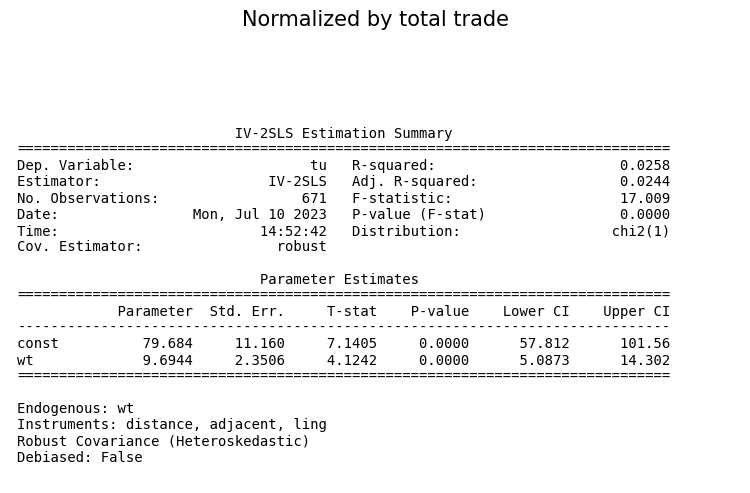

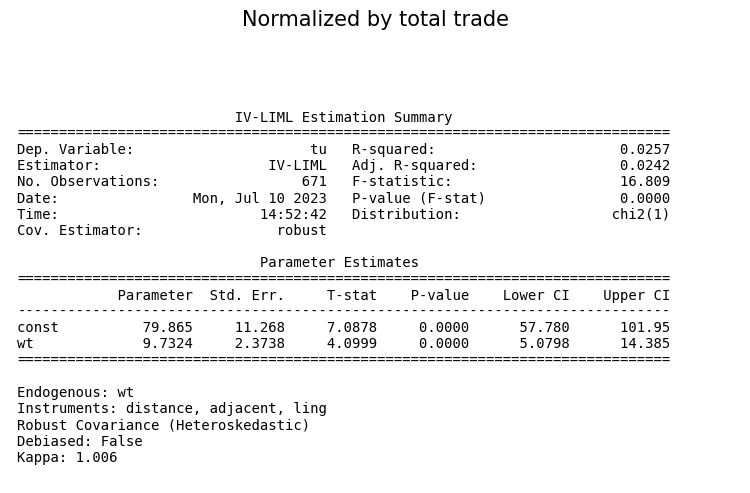

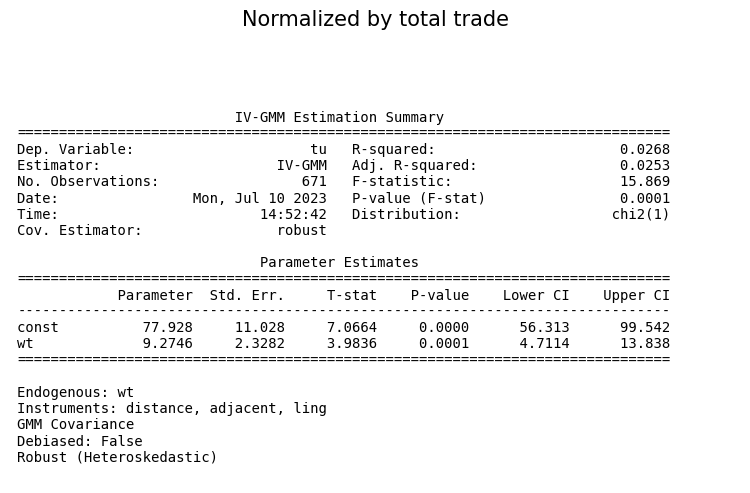

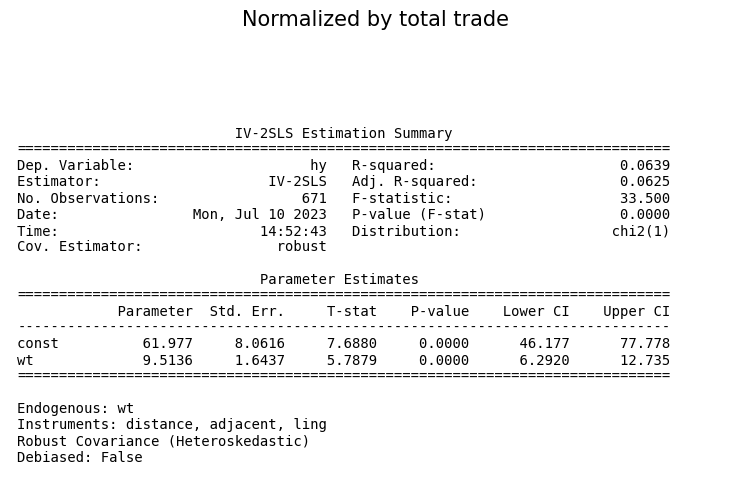

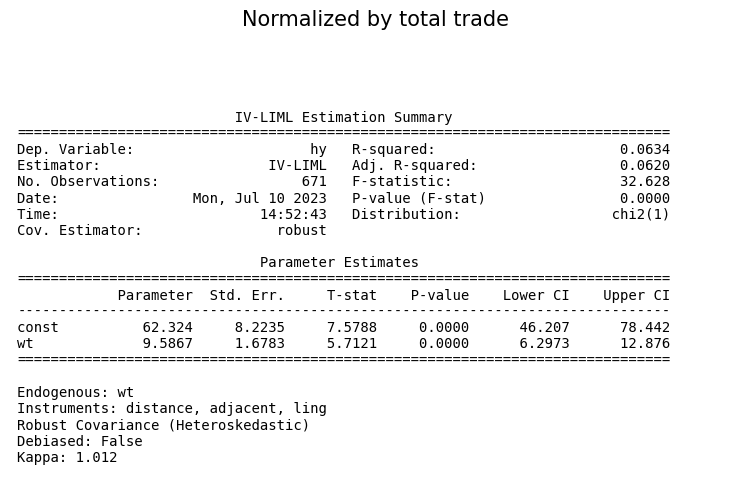

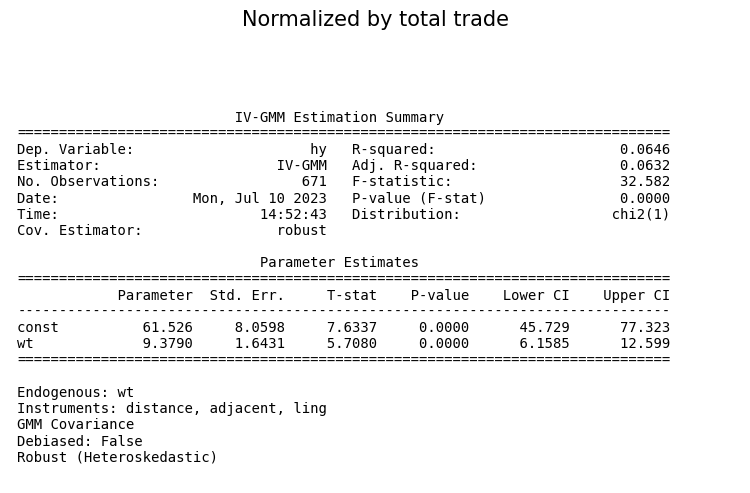

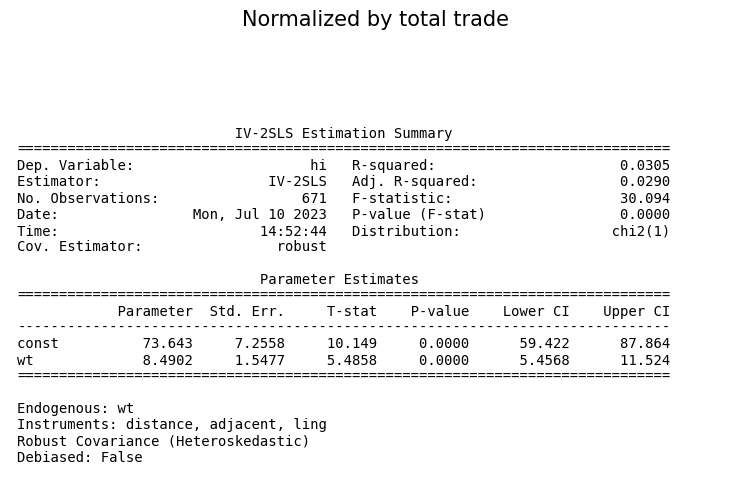

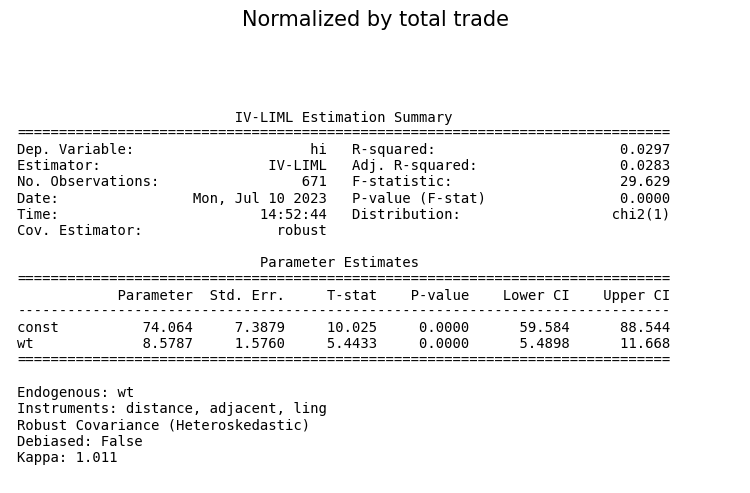

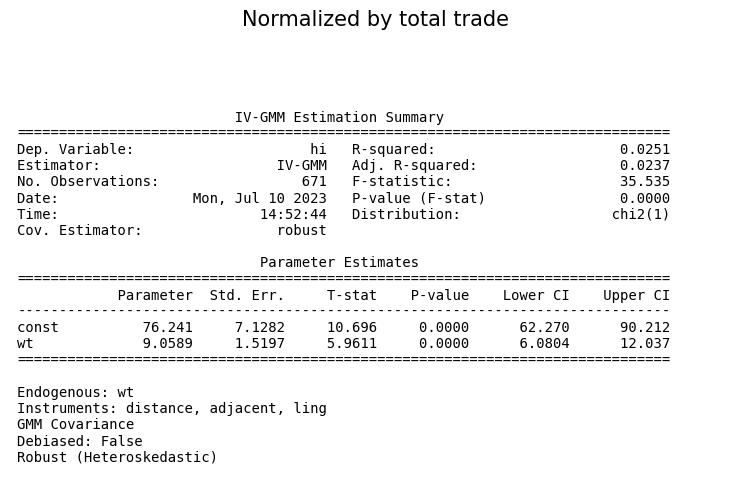

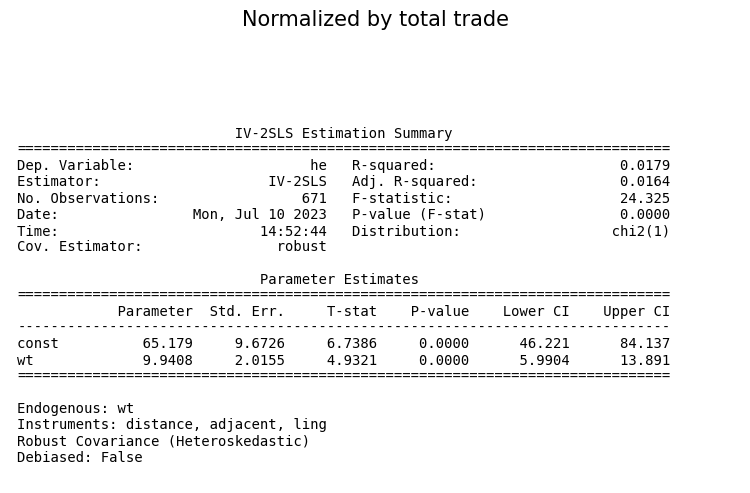

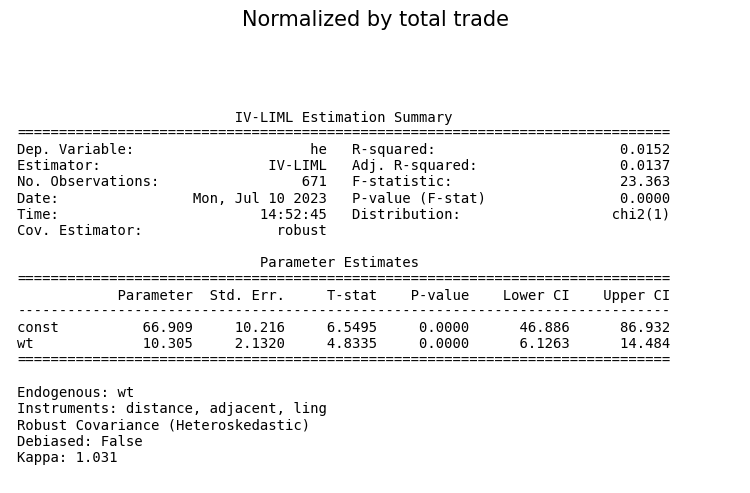

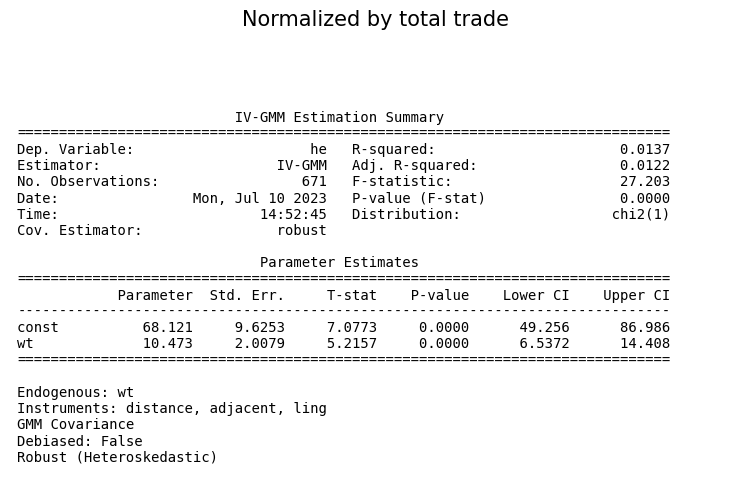

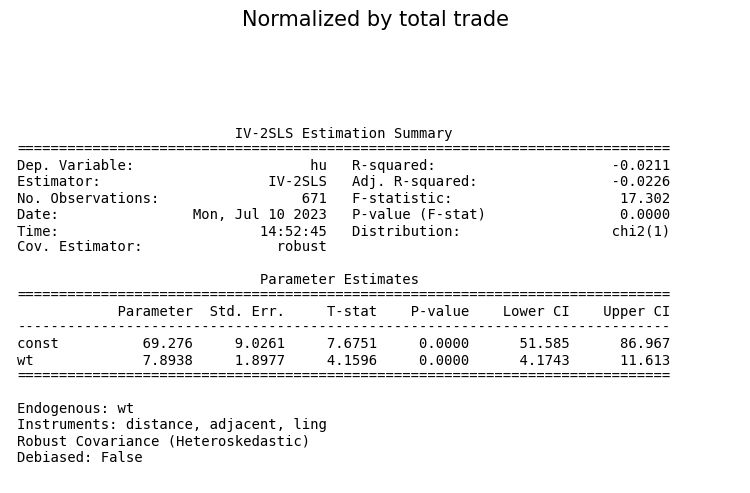

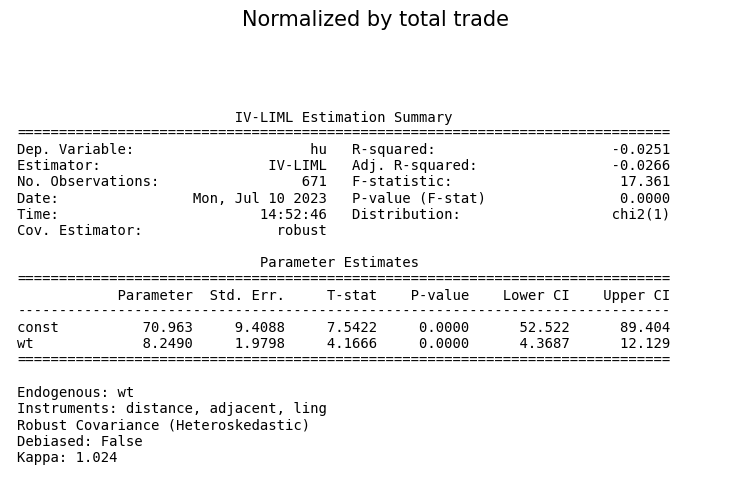

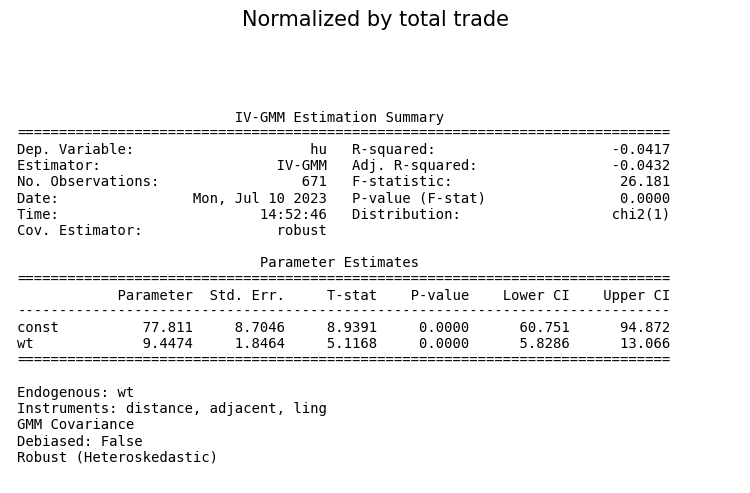

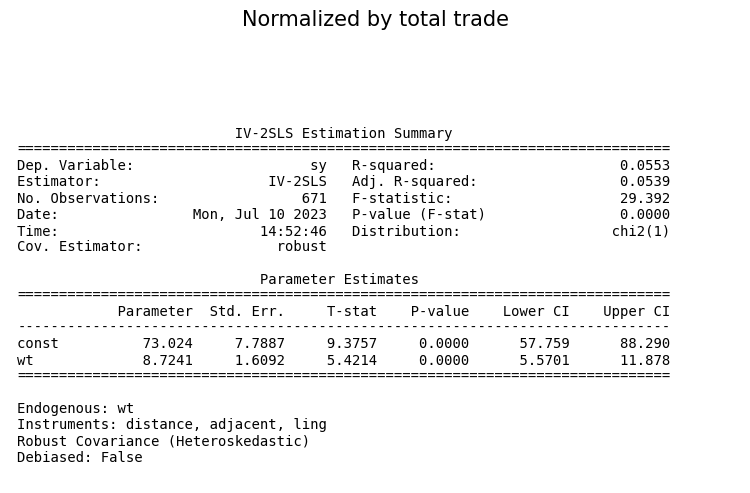

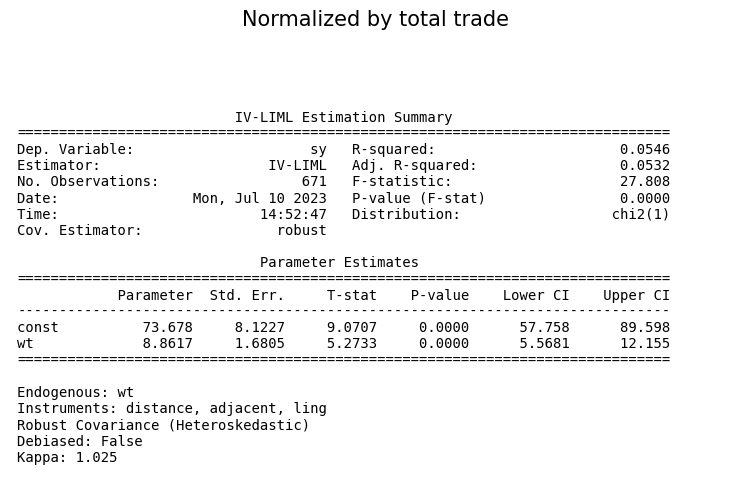

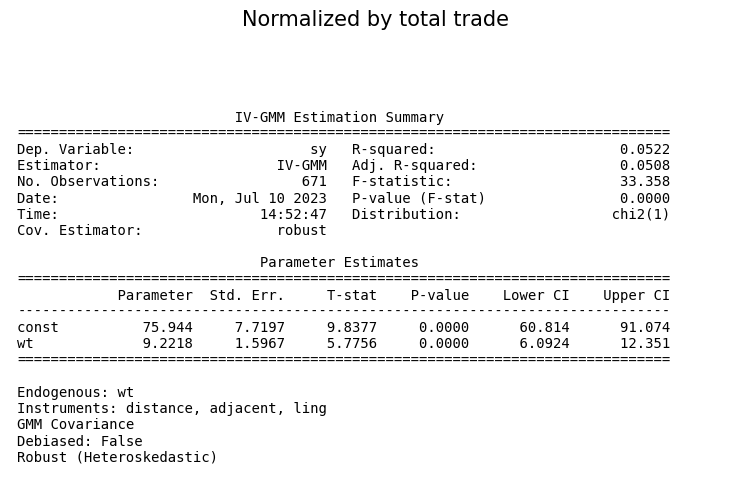

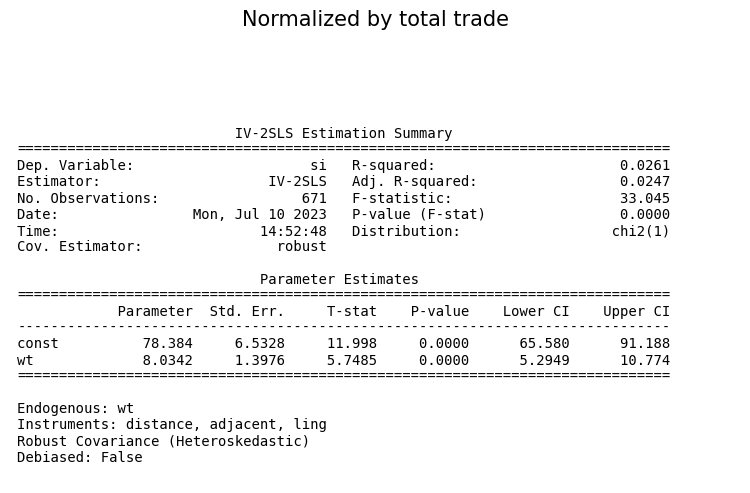

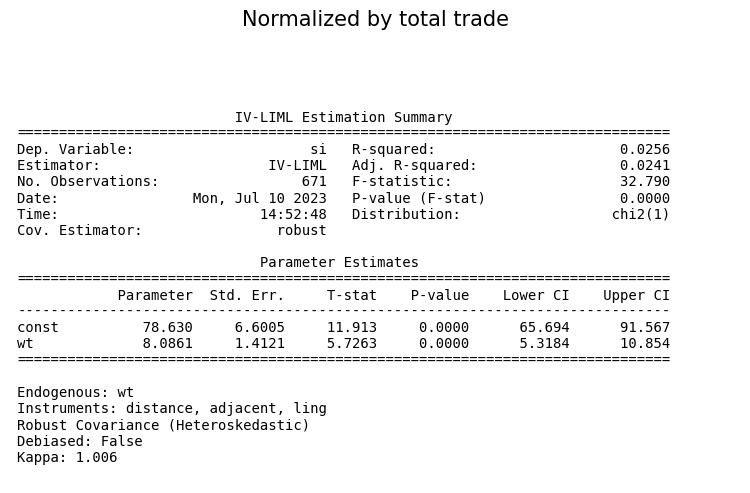

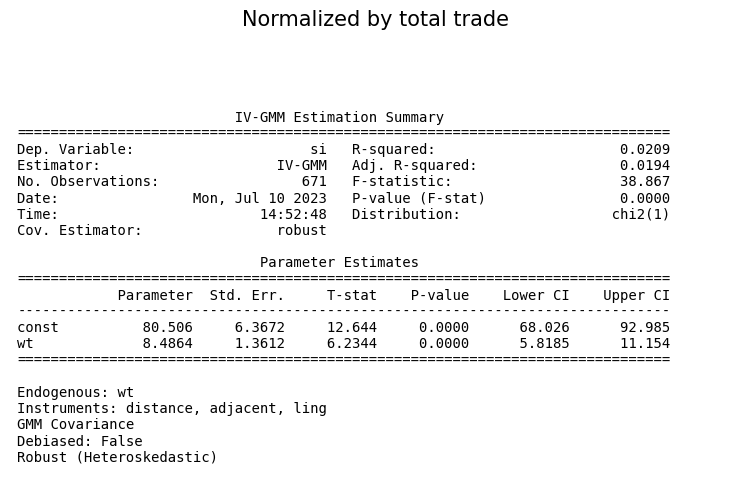

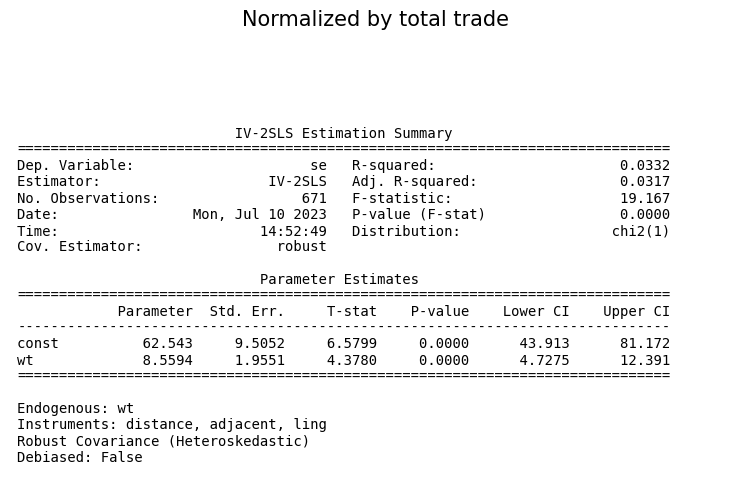

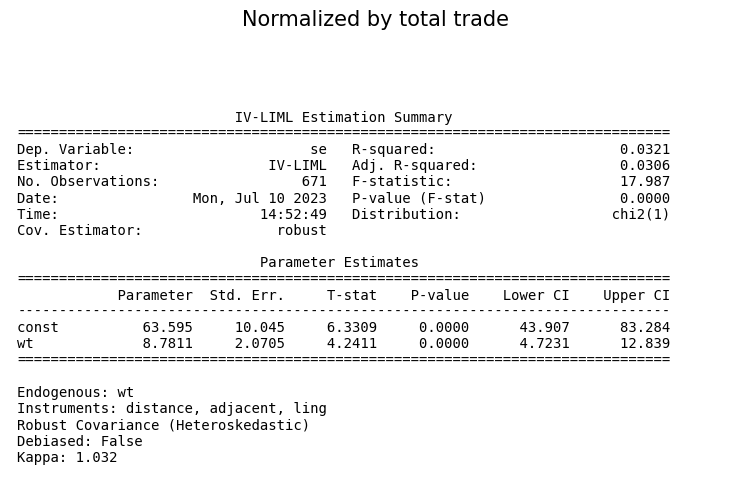

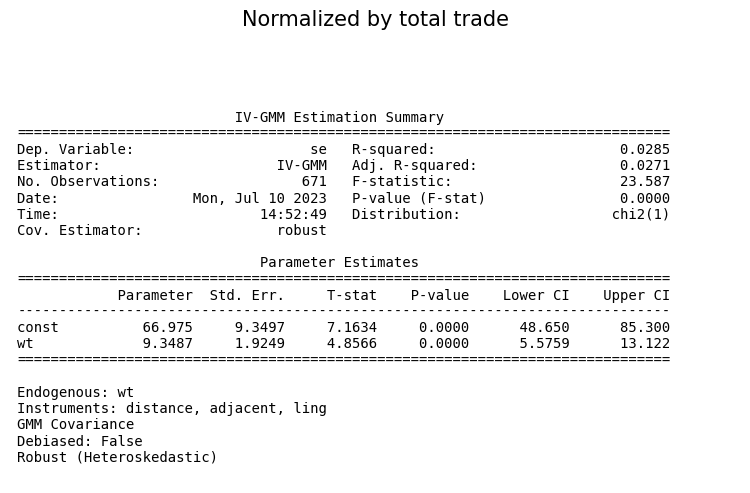

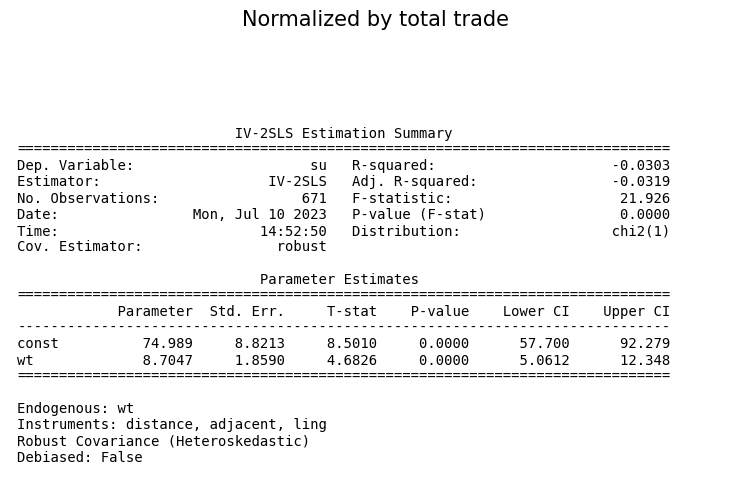

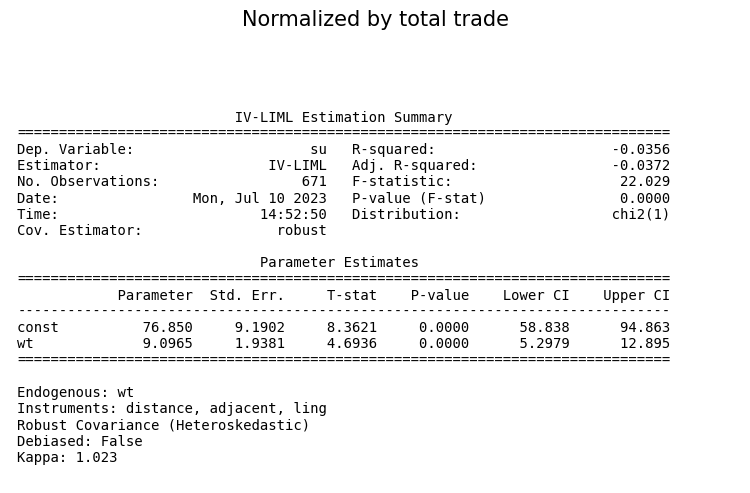

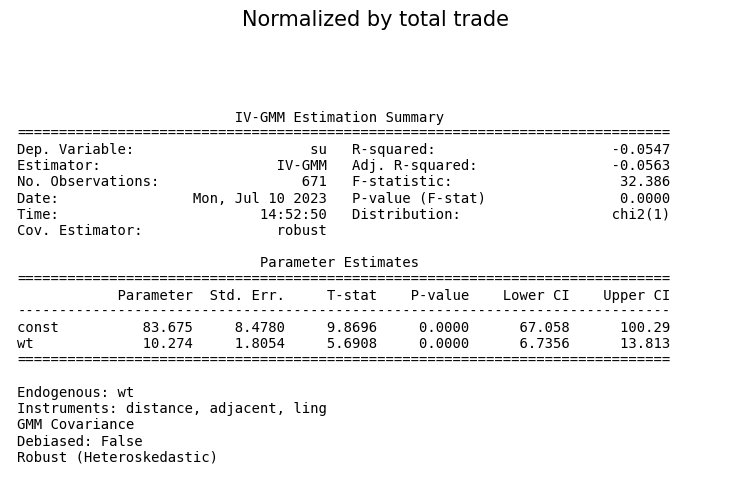

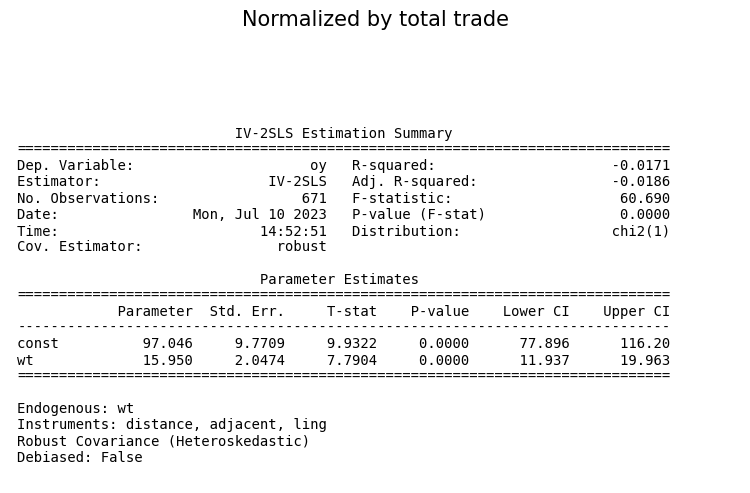

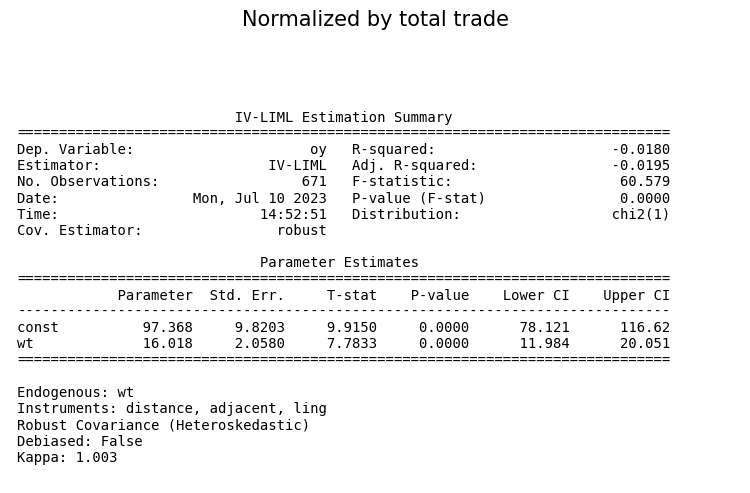

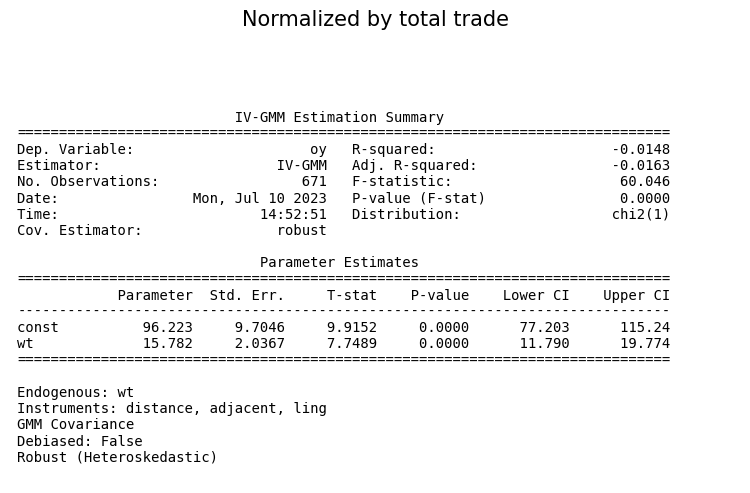

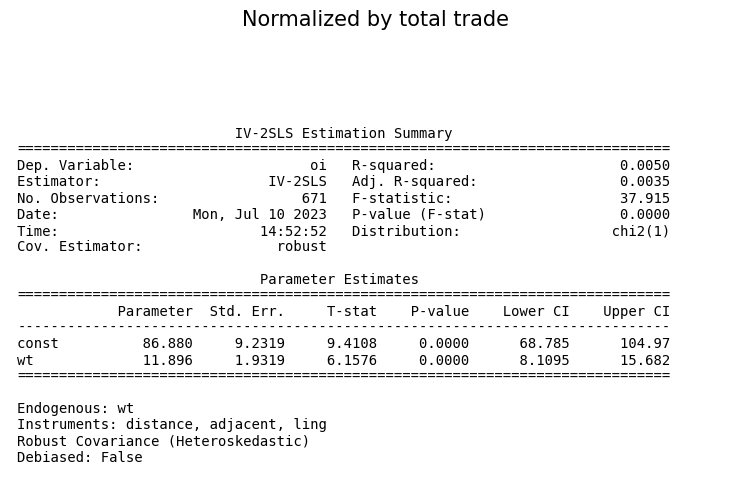

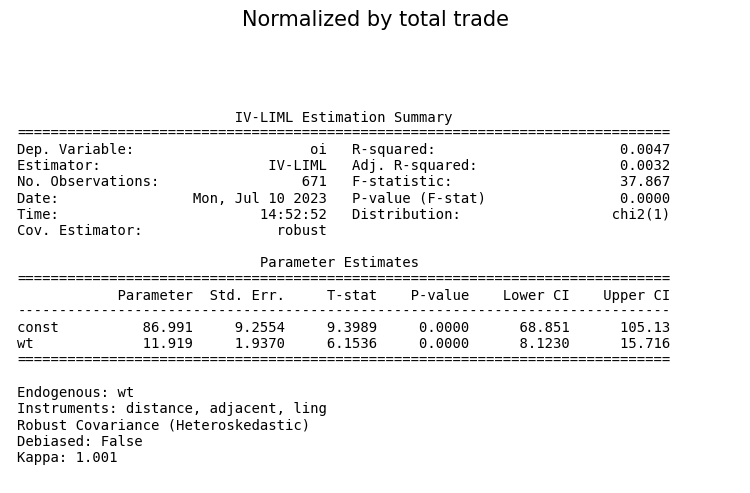

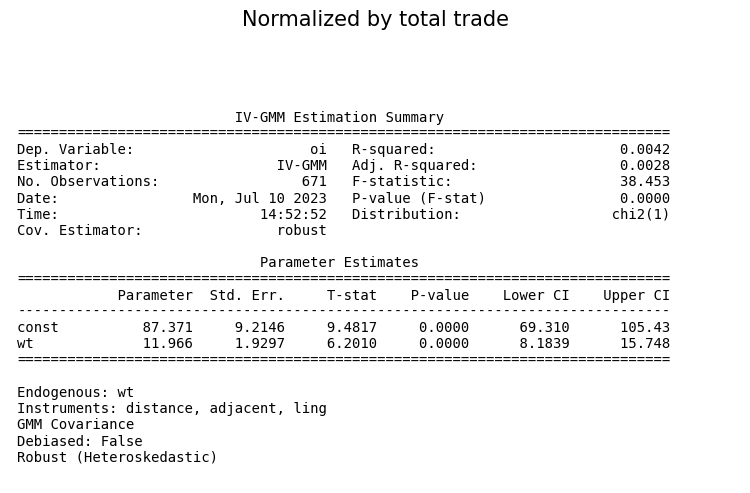

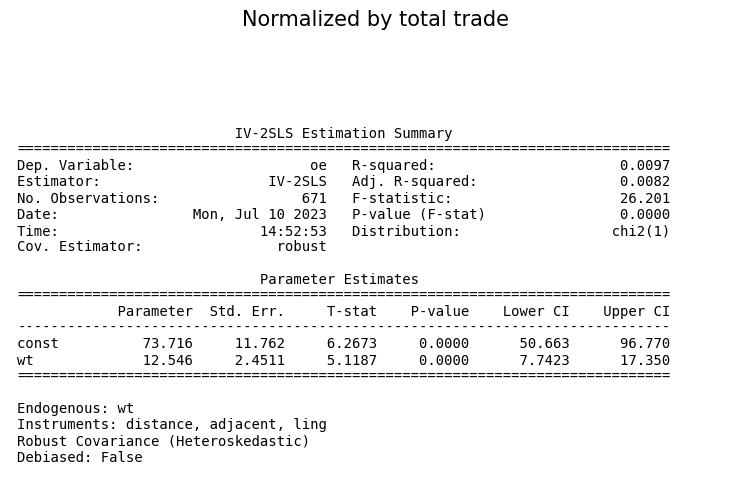

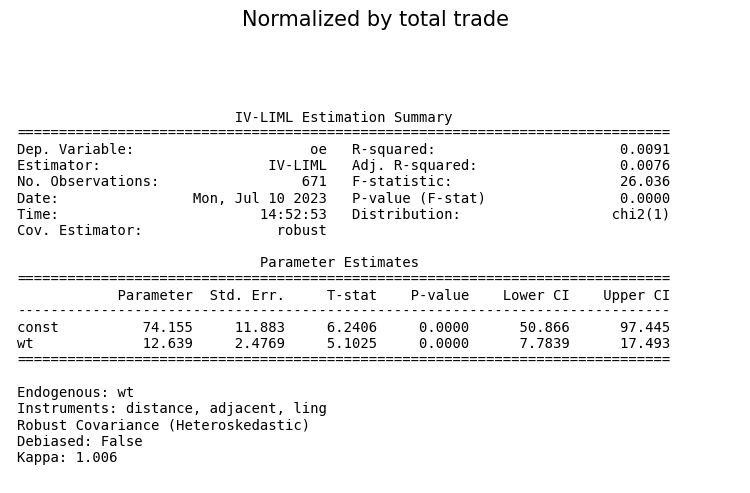

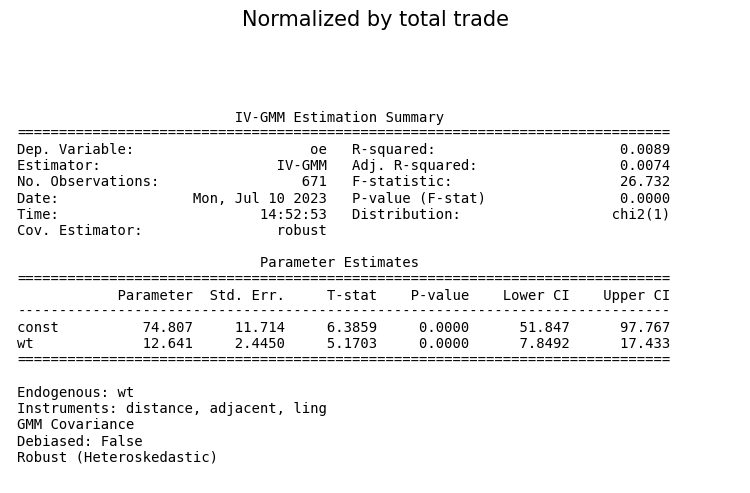

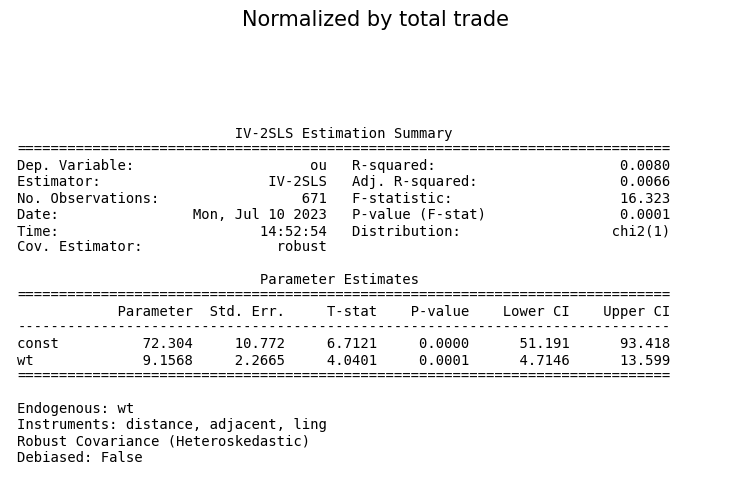

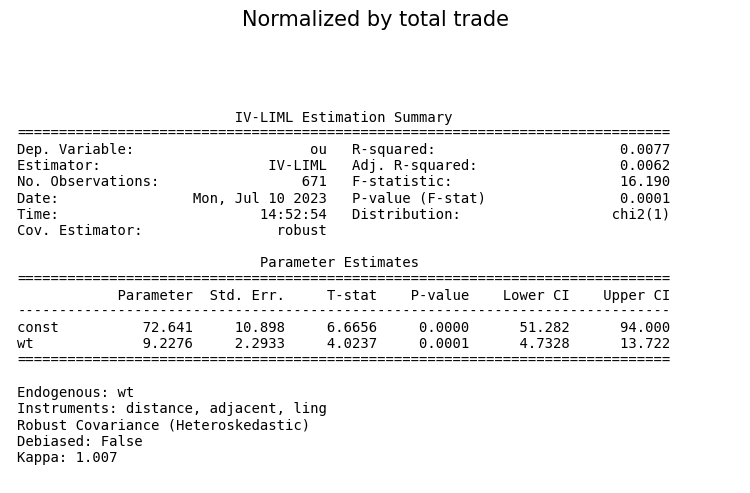

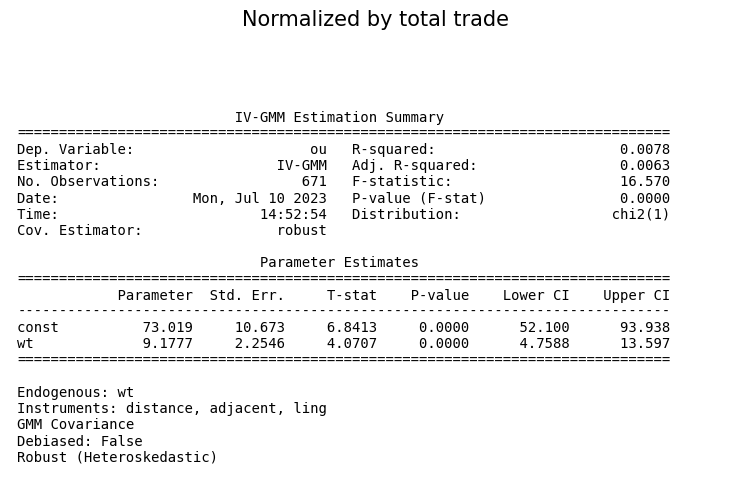

In [124]:
# run IV regressions

# dataframe to hold results:
iv_results_2sls = pd.DataFrame(columns=['Type of correlation', 'Description', 'Estimated slope coefficient (normalized by total trade)','Standard error'])
iv_results_2sls.name = "2SLS"
iv_results_ml = iv_results_2sls.copy()
iv_results_ml.name = "ML"
iv_results_gmm = iv_results_2sls.copy()
iv_results_gmm.name = "GMM"

for i, version in enumerate(versions):
    for table in [iv_results_2sls, iv_results_ml, iv_results_gmm]:
        result = reg.Regressions(instruments).run_regression(method='IV', dependent_var=[version], endog_vars=['wt'], instrument_vars=['distance', 'adjacent', 'ling'], iv_type=table.name)
        beta = result.params[1]
        se = result.std_errors[1]
        description = stata_descriptions[i]

        table.loc[i] = [version, description, beta, se]

In [125]:
# show the table of coefficients of iv results (2sls)
iv_results_2sls[:16]

Type of correlation                                     Description  \
0                   dy  Bilateral Output Correlation, Differenced Data   
1                   di      Bilateral IP Correlation, Differenced Data   
2                   de  Bilateral Empl'y Correlation, Differenced Data   
3                   du  Bilateral Unem't Correlation, Differenced Data   
4                   ty   Bilateral Output Correlation, De-Trended Data   
5                   ti       Bilateral IP Correlation, De-Trended Data   
6                   te   Bilateral Empl'y Correlation, De-Trended Data   
7                   tu   Bilateral Unem't Correlation, De-Trended Data   
8                   hy  Bilateral Output Correlation, HP-Filtered Data   
9                   hi      Bilateral IP Correlation, HP-Filtered Data   
10                  he  Bilateral Empl'y Correlation, HP-Filtered Data   
11                  hu  Bilateral Unem't Correlation, HP-Filtered Data   
12                  sy        Bilateral Output Correlation, HP-SA Data   
13                  si            Bilateral IP Correlation, HP-SA Data   
14                  se        Bilateral Empl'y Correlation, HP-SA Data   
15                  su        Bilateral Unem't Correlation, HP-SA Data   

    Estimated slope coefficient (normalized by total trade)  Standard error  
0                                           11.276017              1.648952  
1                                            8.650146              1.521640  
2                                            8.595028              2.041778  
3                                            8.675894              1.657101  
4                                           12.651175              2.025226  
5                                            9.031954              2.045472  
6                                            9.738704              2.738896  
7                                            9.694415              2.350616  
8                                            9.513577              1.643695  
9                                            8.490153              1.547672  
10                                           9.940758              2.015537  
11                                           7.893823              1.897747  
12                                           8.724110              1.609196  
13                                           8.034248              1.397631  
14                                           8.559436              1.955084  
15                                           8.704700              1.858960

In [126]:
# show the table of coefficients of iv results (mle)
iv_results_ml[:16]

Type of correlation                                     Description  \
0                   dy  Bilateral Output Correlation, Differenced Data   
1                   di      Bilateral IP Correlation, Differenced Data   
2                   de  Bilateral Empl'y Correlation, Differenced Data   
3                   du  Bilateral Unem't Correlation, Differenced Data   
4                   ty   Bilateral Output Correlation, De-Trended Data   
5                   ti       Bilateral IP Correlation, De-Trended Data   
6                   te   Bilateral Empl'y Correlation, De-Trended Data   
7                   tu   Bilateral Unem't Correlation, De-Trended Data   
8                   hy  Bilateral Output Correlation, HP-Filtered Data   
9                   hi      Bilateral IP Correlation, HP-Filtered Data   
10                  he  Bilateral Empl'y Correlation, HP-Filtered Data   
11                  hu  Bilateral Unem't Correlation, HP-Filtered Data   
12                  sy        Bilateral Output Correlation, HP-SA Data   
13                  si            Bilateral IP Correlation, HP-SA Data   
14                  se        Bilateral Empl'y Correlation, HP-SA Data   
15                  su        Bilateral Unem't Correlation, HP-SA Data   

    Estimated slope coefficient (normalized by total trade)  Standard error  
0                                           11.317767              1.663690  
1                                            8.679316              1.534491  
2                                            8.735265              2.093709  
3                                            8.894323              1.695529  
4                                           12.656122              2.027049  
5                                            9.040915              2.070339  
6                                            9.852309              2.801584  
7                                            9.732419              2.373846  
8                                            9.586659              1.678300  
9                                            8.578745              1.576022  
10                                          10.304949              2.131981  
11                                           8.249006              1.979792  
12                                           8.861747              1.680485  
13                                           8.086138              1.412114  
14                                           8.781076              2.070452  
15                                           9.096453              1.938074

In [127]:
# show the table of coefficients of iv results (gmm)
iv_results_gmm[:16]

Type of correlation                                     Description  \
0                   dy  Bilateral Output Correlation, Differenced Data   
1                   di      Bilateral IP Correlation, Differenced Data   
2                   de  Bilateral Empl'y Correlation, Differenced Data   
3                   du  Bilateral Unem't Correlation, Differenced Data   
4                   ty   Bilateral Output Correlation, De-Trended Data   
5                   ti       Bilateral IP Correlation, De-Trended Data   
6                   te   Bilateral Empl'y Correlation, De-Trended Data   
7                   tu   Bilateral Unem't Correlation, De-Trended Data   
8                   hy  Bilateral Output Correlation, HP-Filtered Data   
9                   hi      Bilateral IP Correlation, HP-Filtered Data   
10                  he  Bilateral Empl'y Correlation, HP-Filtered Data   
11                  hu  Bilateral Unem't Correlation, HP-Filtered Data   
12                  sy        Bilateral Output Correlation, HP-SA Data   
13                  si            Bilateral IP Correlation, HP-SA Data   
14                  se        Bilateral Empl'y Correlation, HP-SA Data   
15                  su        Bilateral Unem't Correlation, HP-SA Data   

    Estimated slope coefficient (normalized by total trade)  Standard error  
0                                           11.054083              1.644706  
1                                            9.108738              1.490194  
2                                            8.033710              2.033973  
3                                            9.049901              1.638268  
4                                           12.752311              2.013123  
5                                            9.163569              2.033623  
6                                            9.289678              2.722108  
7                                            9.274638              2.328217  
8                                            9.378997              1.643124  
9                                            9.058897              1.519664  
10                                          10.472643              2.007909  
11                                           9.447450              1.846375  
12                                           9.221785              1.596669  
13                                           8.486434              1.361232  
14                                           9.348725              1.924943  
15                                          10.274070              1.805367

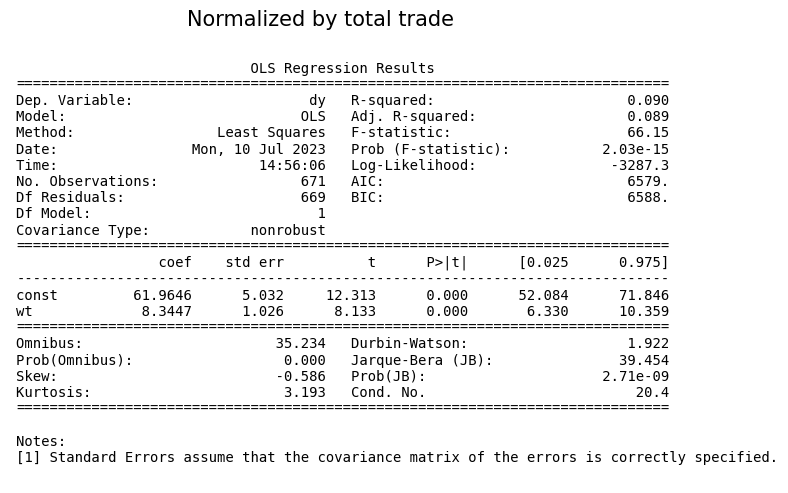

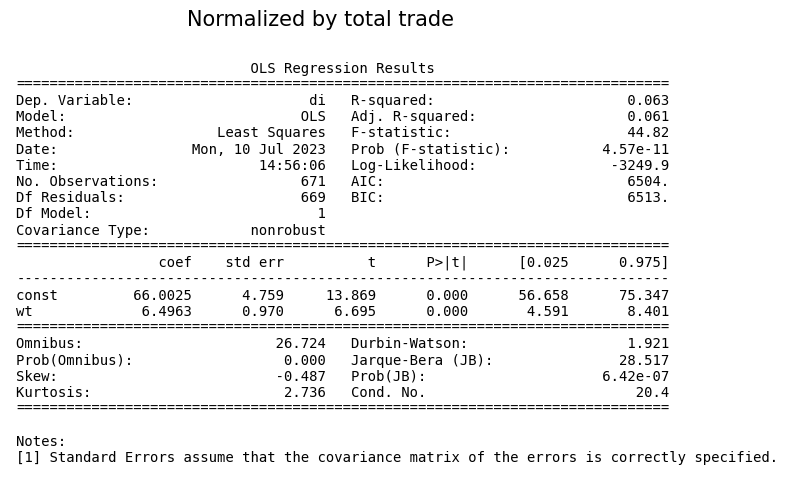

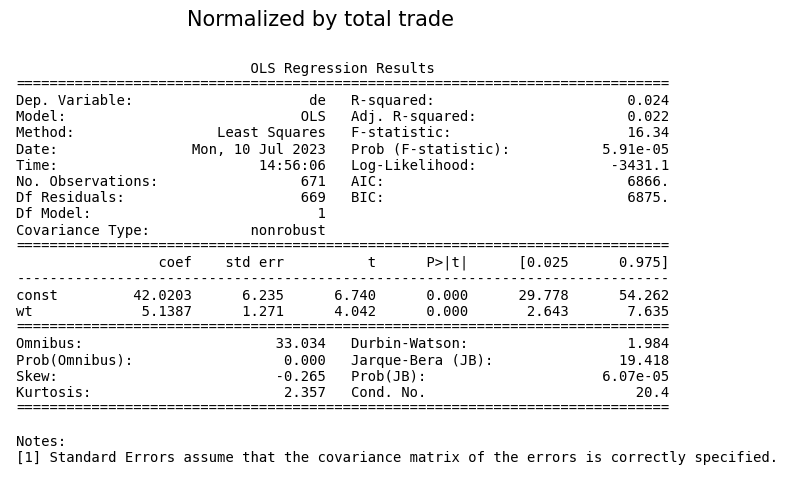

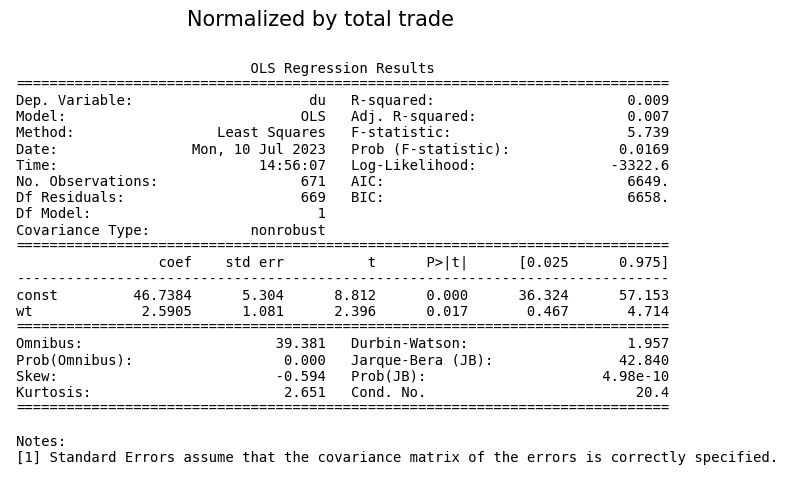

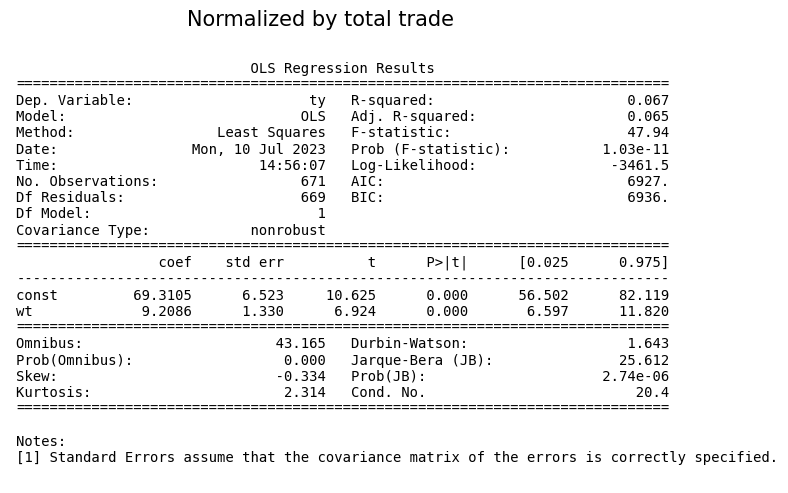

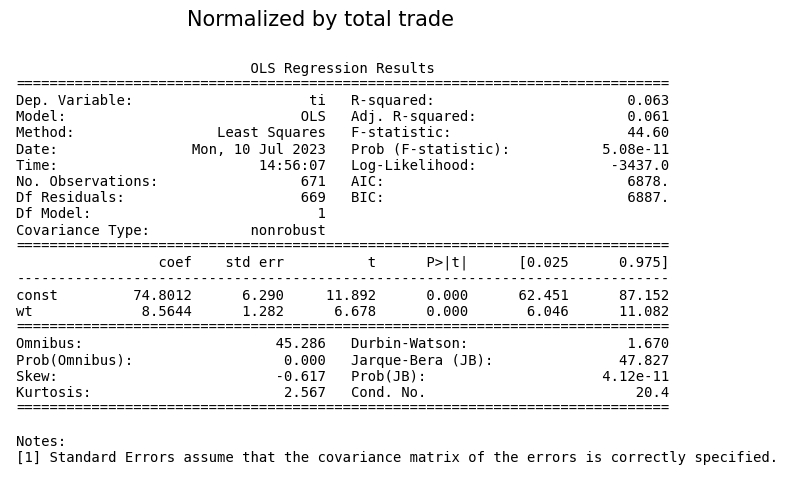

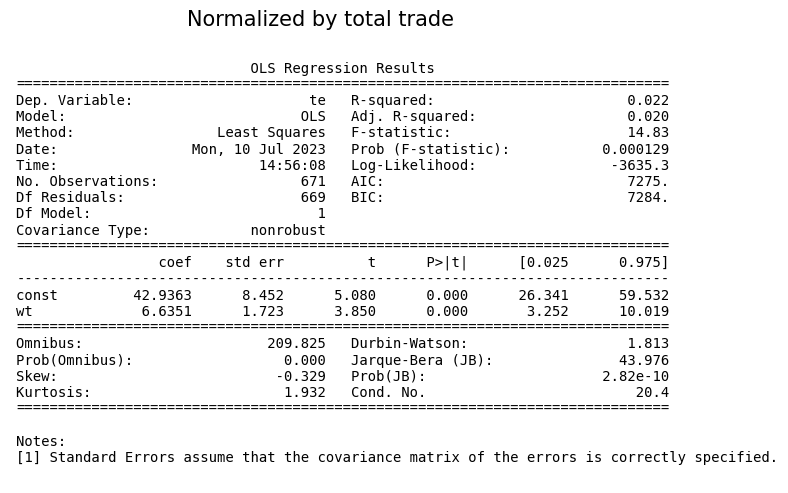

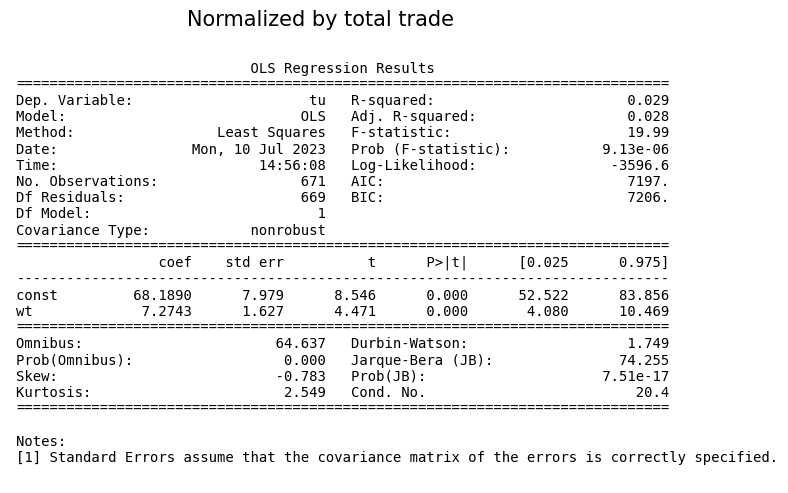

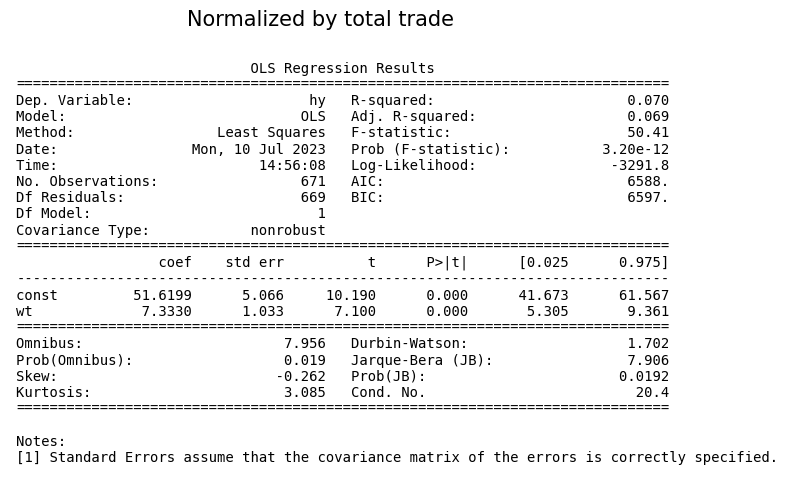

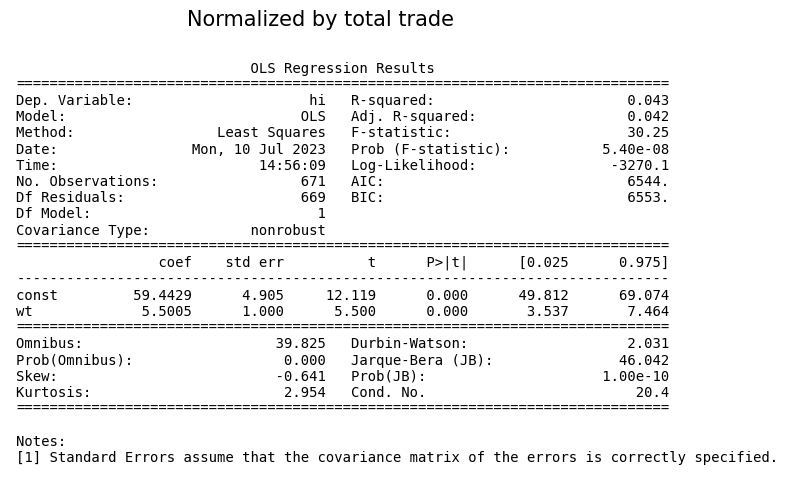

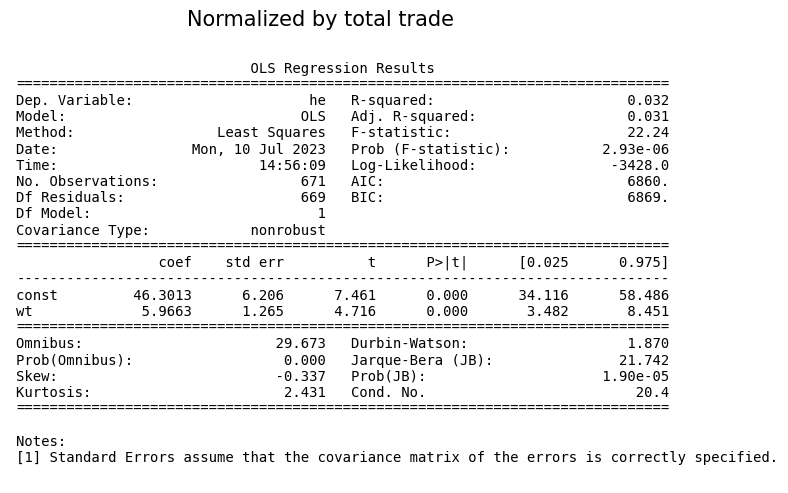

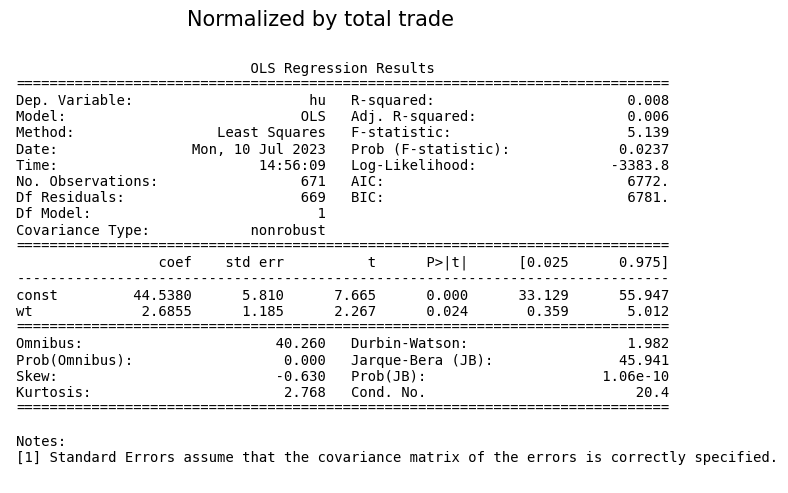

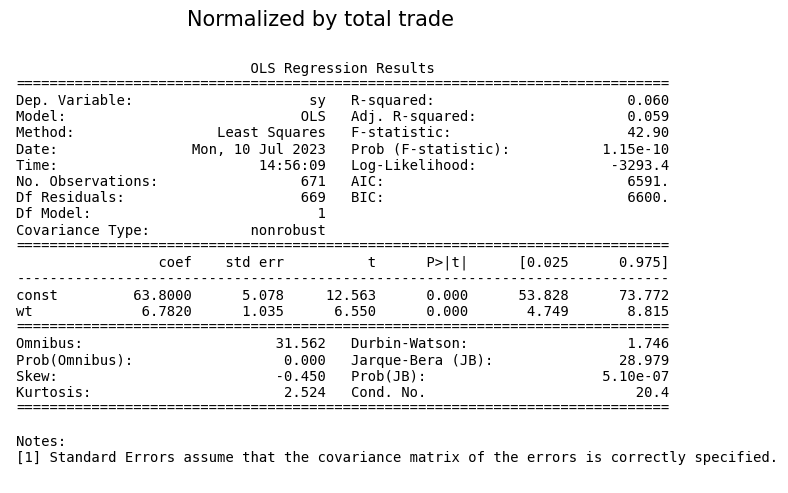

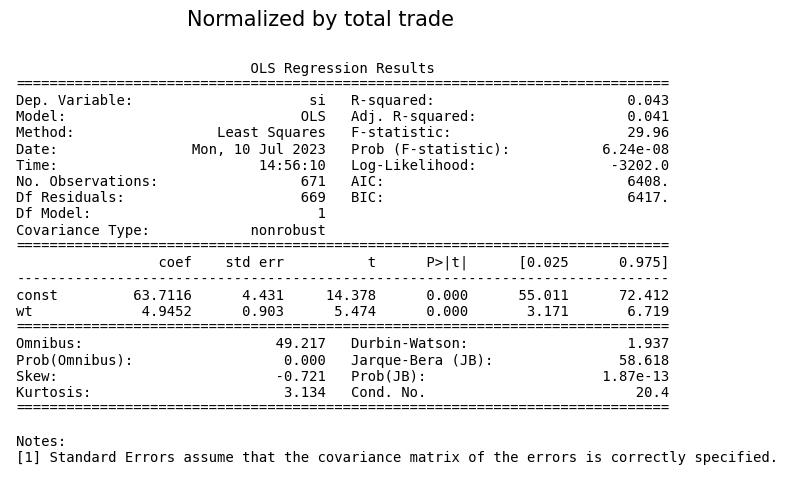

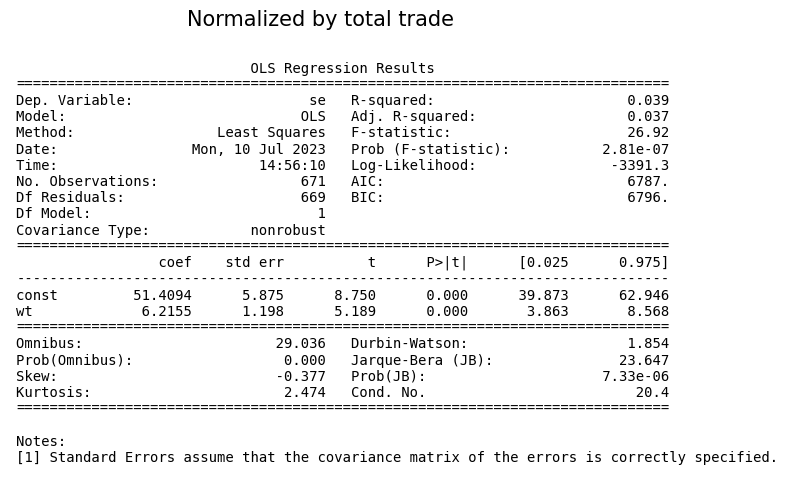

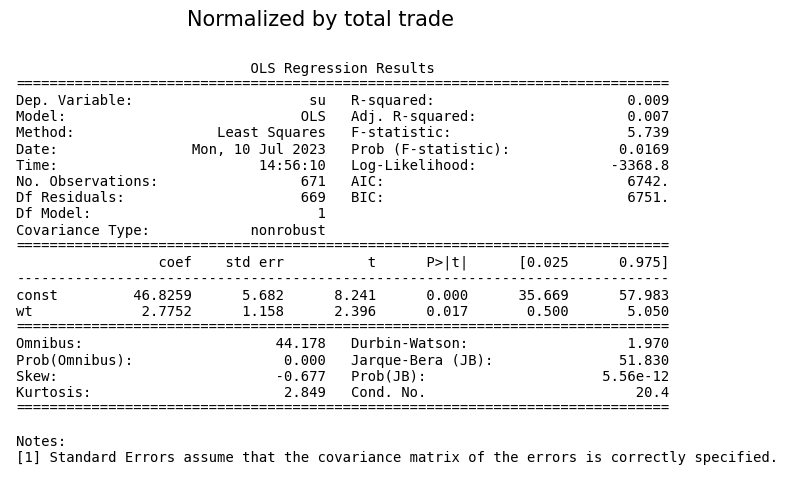

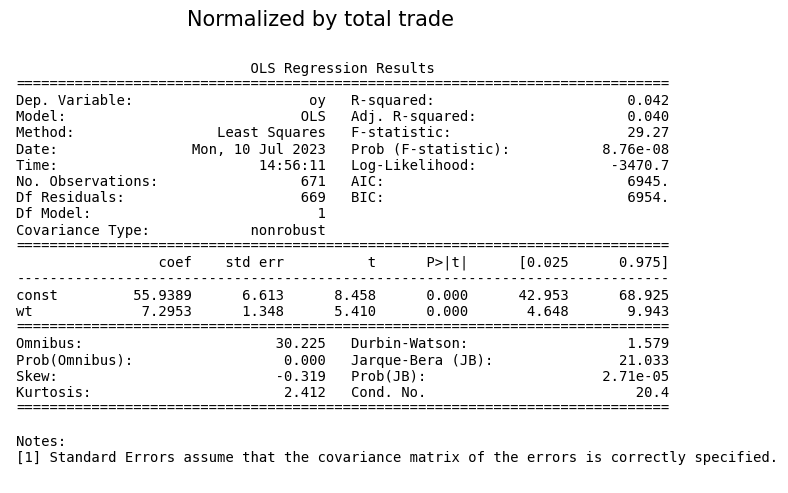

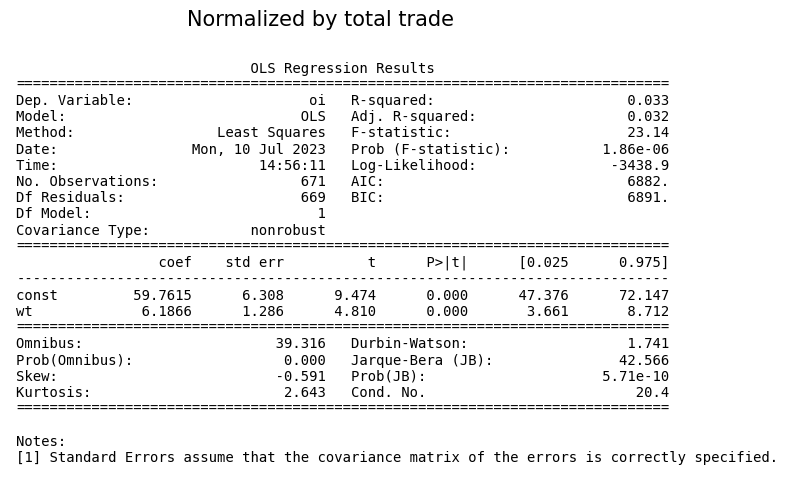

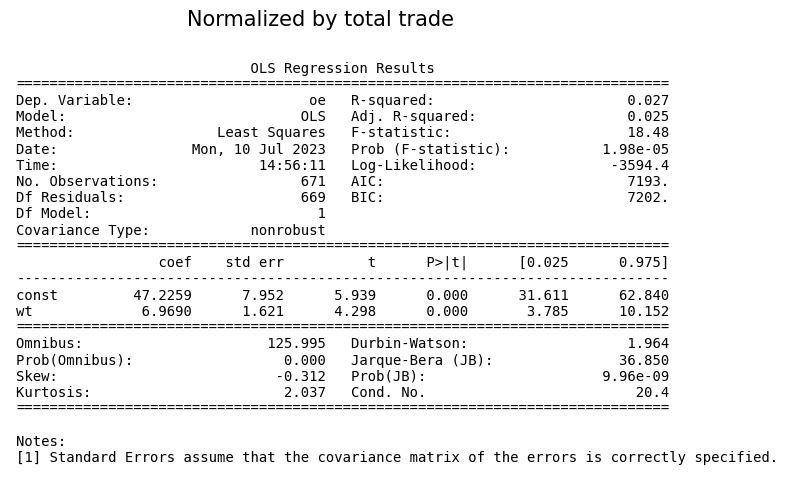

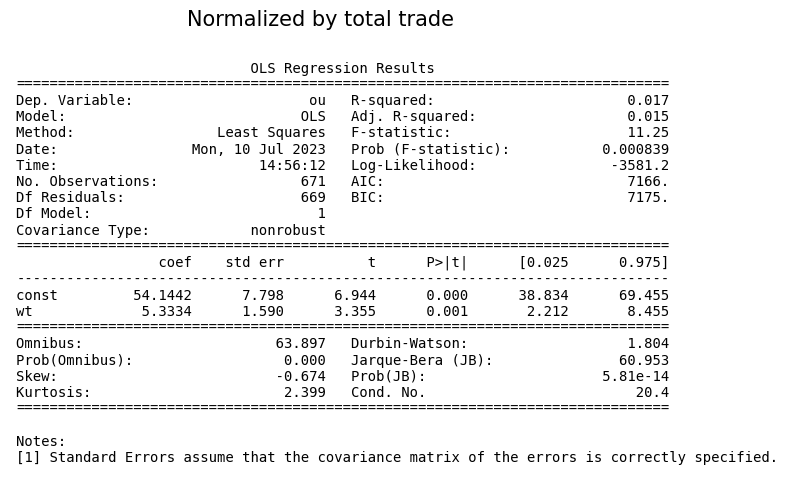

In [128]:
# look at a regular OLS regression of correlations on wt
ols_results = pd.DataFrame(columns=['Type of correlation', 'Description', 'OLS estimated slope coefficient (normalized by total trade)','Standard error'])

for i, version in enumerate(versions):
    result = reg.Regressions(instruments).run_regression(method='OLS', dependent_var=[version], independent_vars=['wt'])
    beta = result.params[1]
    se = result.bse[1]
    description = stata_descriptions[i]

    ols_results.loc[i] = [version, description, beta, se]

In [129]:
ols_results[:16]

Type of correlation                                     Description  \
0                   dy  Bilateral Output Correlation, Differenced Data   
1                   di      Bilateral IP Correlation, Differenced Data   
2                   de  Bilateral Empl'y Correlation, Differenced Data   
3                   du  Bilateral Unem't Correlation, Differenced Data   
4                   ty   Bilateral Output Correlation, De-Trended Data   
5                   ti       Bilateral IP Correlation, De-Trended Data   
6                   te   Bilateral Empl'y Correlation, De-Trended Data   
7                   tu   Bilateral Unem't Correlation, De-Trended Data   
8                   hy  Bilateral Output Correlation, HP-Filtered Data   
9                   hi      Bilateral IP Correlation, HP-Filtered Data   
10                  he  Bilateral Empl'y Correlation, HP-Filtered Data   
11                  hu  Bilateral Unem't Correlation, HP-Filtered Data   
12                  sy        Bilateral Output Correlation, HP-SA Data   
13                  si            Bilateral IP Correlation, HP-SA Data   
14                  se        Bilateral Empl'y Correlation, HP-SA Data   
15                  su        Bilateral Unem't Correlation, HP-SA Data   

    OLS estimated slope coefficient (normalized by total trade)  \
0                                            8.344721             
1                                            6.496280             
2                                            5.138654             
3                                            2.590518             
4                                            9.208576             
5                                            8.564367             
6                                            6.635117             
7                                            7.274259             
8                                            7.332962             
9                                            5.500518             
10                                           5.966250             
11                                           2.685519             
12                                           6.782012             
13                                           4.945158             
14                                           6.215455             
15                                           2.775178             

    Standard error  
0         1.026013  
1         0.970309  
2         1.271181  
3         1.081393  
4         1.330008  
5         1.282409  
6         1.723232  
7         1.626819  
8         1.032858  
9         1.000013  
10        1.265228  
11        1.184628  
12        1.035408  
13        0.903451  
14        1.197916  
15        1.158486